# 1. Import the Libraries necessary for the Dataset

In [1]:
import pandas as pd
import os
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
import re
import string
import random
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
from matplotlib import style
%matplotlib inline

# 2. Import the Dataset/Reading the data

In [2]:
myntra = pd.read_csv("Myntra_data.csv")

# 3. Clean the Dataset

In [3]:
myntra.shape

(168029, 13)

In [4]:
myntra.columns

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_link', 'img_link', 'product_tag',
       'brand_tag', 'discount_amount', 'discount_percent'],
      dtype='object')

In [5]:
myntra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168029 entries, 0 to 168028
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      168029 non-null  object 
 1   brand_name        168029 non-null  object 
 2   rating            168029 non-null  float64
 3   rating_count      168029 non-null  int64  
 4   marked_price      168029 non-null  int64  
 5   discounted_price  168029 non-null  int64  
 6   sizes             168029 non-null  object 
 7   product_link      168029 non-null  object 
 8   img_link          168029 non-null  object 
 9   product_tag       168029 non-null  object 
 10  brand_tag         168029 non-null  object 
 11  discount_amount   168029 non-null  int64  
 12  discount_percent  168029 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 16.7+ MB


In [6]:
myntra.head()

product_name      brand_name  rating  rating_count  \
0   Croc Textured Two Fold Wallet     Lino Perros     0.0             0   
1             Men Striped Sliders  Mast & Harbour     4.0            76   
2            Printed A-line Kurta            Biba     4.3            66   
3    Girls Floral Printed T-shirt        Anthrilo     0.0             0   
4  Women Printed Kurta with Skirt    FASHION DWAR     0.0             0   

   marked_price  discounted_price                      sizes  \
0          1295               828                    Onesize   
1          1299               584  UK6,UK7,UK8,UK9,UK10,UK11   
2          1999              1599           S,M,L,XL,XXL,3XL   
3           599               539            7-8Y,8-9Y,9-10Y   
4          2899              2899                   S,M,L,XL   

                                        product_link  \
0  wallets/lino-perros/lino-perros-women-peach-co...   
1  flip-flops/mast--harbour/mast--harbour-men-nav...   
2  kurtas/biba/biba-women-off-white--black-printe...   
3  tshirts/anthrilo/anthrilo-girls-white-floral-p...   
4  kurta-sets/fashion-dwar/fashion-dwar-women-mul...   

                                            img_link product_tag  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...     wallets   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...  flip-flops   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...      kurtas   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...     tshirts   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...  kurta-sets   

       brand_tag  discount_amount  discount_percent  
0    lino-perros              467                36  
1  mast--harbour              715                55  
2           biba              400                20  
3       anthrilo               60                10  
4   fashion-dwar                0                 0

In [7]:
# can delete the duplicate rows if exists
myntra.drop_duplicates(inplace=True)
# running a model using chatGPT

We can drop some of the columns which are not necessary/relevant for our analysis
* product_link
* img_link

In [8]:
myntra.drop(['product_link','img_link'],axis = 1, inplace=True)
myntra.columns
# del myntra['img_link']
# del myntra['product_link']
# both can be used

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_tag', 'brand_tag',
       'discount_amount', 'discount_percent'],
      dtype='object')

In [9]:
myntra.head()

product_name      brand_name  rating  rating_count  \
0   Croc Textured Two Fold Wallet     Lino Perros     0.0             0   
1             Men Striped Sliders  Mast & Harbour     4.0            76   
2            Printed A-line Kurta            Biba     4.3            66   
3    Girls Floral Printed T-shirt        Anthrilo     0.0             0   
4  Women Printed Kurta with Skirt    FASHION DWAR     0.0             0   

   marked_price  discounted_price                      sizes product_tag  \
0          1295               828                    Onesize     wallets   
1          1299               584  UK6,UK7,UK8,UK9,UK10,UK11  flip-flops   
2          1999              1599           S,M,L,XL,XXL,3XL      kurtas   
3           599               539            7-8Y,8-9Y,9-10Y     tshirts   
4          2899              2899                   S,M,L,XL  kurta-sets   

       brand_tag  discount_amount  discount_percent  
0    lino-perros              467                36  
1  mast--harbour              715                55  
2           biba              400                20  
3       anthrilo               60                10  
4   fashion-dwar                0                 0

Checking for missing values if any

In [10]:
missing_values = myntra.isnull().sum()
print(missing_values)

product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
dtype: int64


There seem to be no missing values. Therefore, we can move ahead with our analysis

In [ ]:
# E.g., Age - % unserdtanding
# Outliers & null values - % unserdtanding
>80%
60-80%

40-80%
20-40% - replace
<20% - treat

In [92]:
# as there are no null values
import seaborn as sns
# sns.heatmap(myntra_subset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 4. Exploratory Data Analysis (EDA) OR Exhaustive EDA to generate hypothesis == COMPLETED

In [11]:
myntra.columns

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_tag', 'brand_tag',
       'discount_amount', 'discount_percent'],
      dtype='object')

In [94]:
myntra.describe()

rating   rating_count   marked_price  discounted_price  \
count  146611.000000  146611.000000  146611.000000     146611.000000   
mean        2.317154     123.589219    2525.860379       1532.622675   
std         2.097438     817.995615    2437.720930       1842.427134   
min         0.000000       0.000000      50.000000         49.000000   
25%         0.000000       0.000000    1299.000000        679.000000   
50%         3.600000       6.000000    1999.000000       1012.000000   
75%         4.300000      34.000000    2999.000000       1749.000000   
max         5.000000   55900.000000  113999.000000      45900.000000   

       discount_amount  discount_percent  
count    146611.000000     146611.000000  
mean        993.237704         37.147765  
std        1235.525991         24.594289  
min           0.000000          0.000000  
25%         210.000000         15.000000  
50%         702.000000         40.000000  
75%        1317.000000         59.000000  
max       68400.000000         91.000000

In [12]:
myntra.describe().T

count         mean          std   min     25%     50%  \
rating            146611.0     2.317154     2.097438   0.0     0.0     3.6   
rating_count      146611.0   123.589219   817.995615   0.0     0.0     6.0   
marked_price      146611.0  2525.860379  2437.720930  50.0  1299.0  1999.0   
discounted_price  146611.0  1532.622675  1842.427134  49.0   679.0  1012.0   
discount_amount   146611.0   993.237704  1235.525991   0.0   210.0   702.0   
discount_percent  146611.0    37.147765    24.594289   0.0    15.0    40.0   

                     75%       max  
rating               4.3       5.0  
rating_count        34.0   55900.0  
marked_price      2999.0  113999.0  
discounted_price  1749.0   45900.0  
discount_amount   1317.0   68400.0  
discount_percent    59.0      91.0

In [13]:
myntra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146611 entries, 0 to 167991
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      146611 non-null  object 
 1   brand_name        146611 non-null  object 
 2   rating            146611 non-null  float64
 3   rating_count      146611 non-null  int64  
 4   marked_price      146611 non-null  int64  
 5   discounted_price  146611 non-null  int64  
 6   sizes             146611 non-null  object 
 7   product_tag       146611 non-null  object 
 8   brand_tag         146611 non-null  object 
 9   discount_amount   146611 non-null  int64  
 10  discount_percent  146611 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.4+ MB


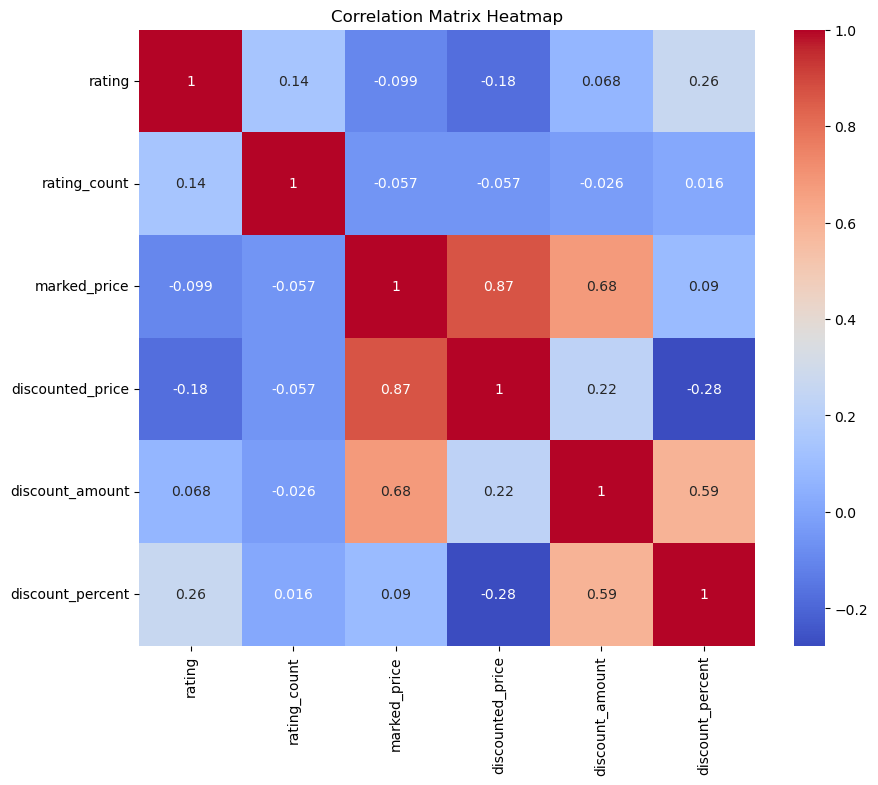

In [14]:
# Compute the correlation matrix
correlation_matrix = myntra.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

As seen from above rating and discounted_price have a very high +ve correlation

In [97]:
# Correlation Analysis
correlation_matrix = myntra[['rating', 'discounted_price']].corr()
print(correlation_matrix)

                    rating  discounted_price
rating            1.000000         -0.176494
discounted_price -0.176494          1.000000


# 4.1 product_name (Categorical column)

In [98]:
prod_name_counts = myntra['product_name'].value_counts()
print(prod_name_counts)

Slim Fit Casual Shirt             1848
Men Slim Fit Jeans                1293
Men Running Shoes                 1047
Women Open Toe Flats               897
Men Slim Fit Casual Shirt          831
                                  ... 
Plant Stand with Pot Holder          1
Striped Sustainable Midi Dress       1
Men D Ringle Buckle Belt             1
Women Sustainable Printed Top        1
Solid Twill Seat Cushion             1
Name: product_name, Length: 46013, dtype: int64


In [99]:
# Select only the top 5 value counts
top_5_prod_counts = prod_name_counts.head()
top_5_prod_counts

Slim Fit Casual Shirt        1848
Men Slim Fit Jeans           1293
Men Running Shoes            1047
Women Open Toe Flats          897
Men Slim Fit Casual Shirt     831
Name: product_name, dtype: int64

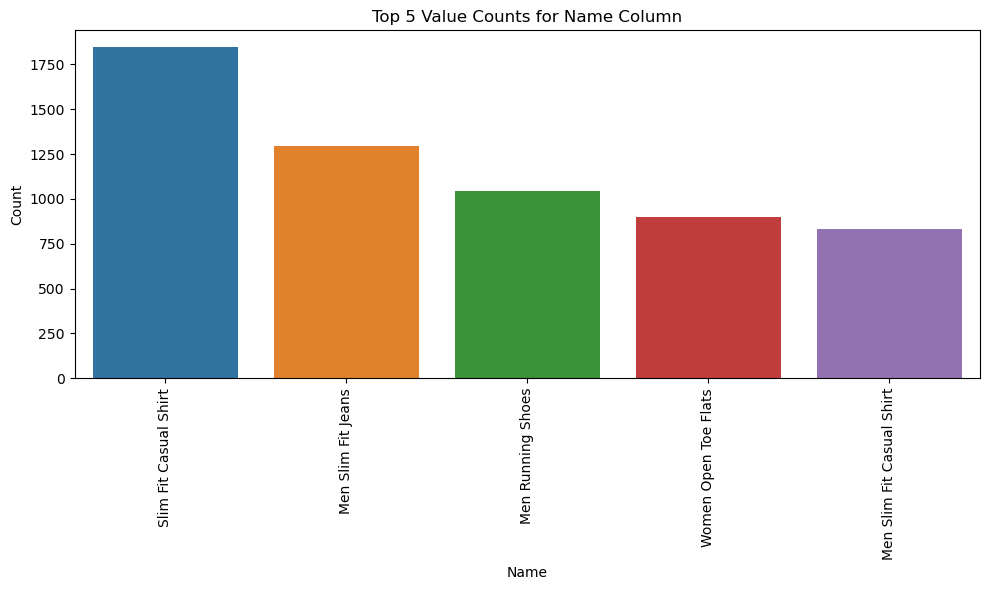

In [100]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_prod_counts.index, y=top_5_prod_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 Value Counts for Name Column')
plt.tight_layout()

# Display the plot
plt.show()

The commonly listed products on Myntra are as folows:
1. Slim Fit Casual Shirt        1848
2. Men Slim Fit Jeans           1293
3. Men Running Shoes            1047
4. Women Open Toe Flats          897
5. Men Slim Fit Casual Shirt     831

In [101]:
prod_names = myntra['product_name'].value_counts().head().index
prod_names
prod_values = myntra['product_name'].value_counts().head().values
prod_values

array([1848, 1293, 1047,  897,  831], dtype=int64)

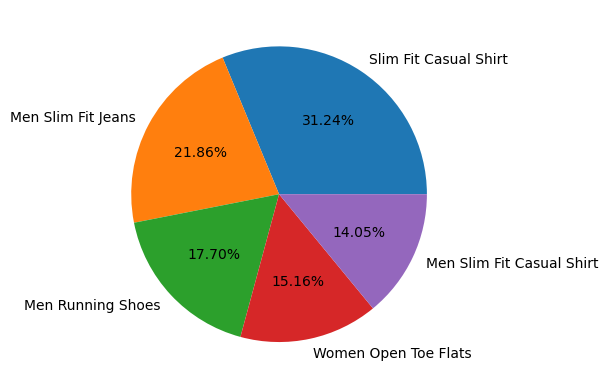

In [215]:
plt.pie(prod_values[:5],labels=prod_names[:5],autopct='%1.2f%%')
plt.show()

Observation - Myntra's highest number of products sold pertain to 'Slim Fit casual shirt' followed by 'Men slim fit jeans' & 'Men running shoes'

<Axes: ylabel='product_name'>

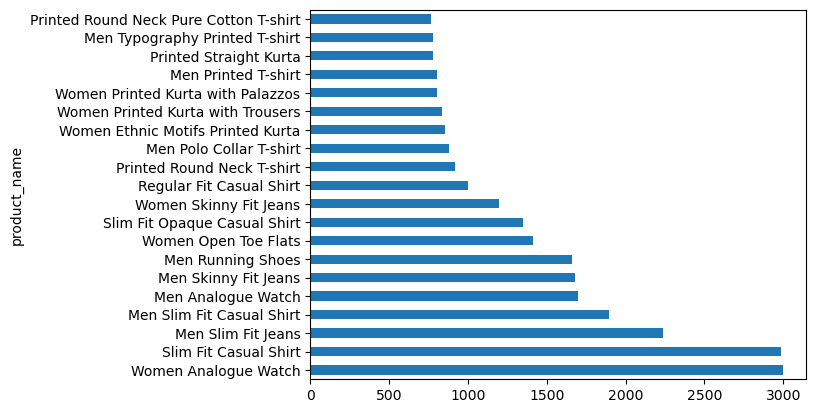

In [102]:
myntra.groupby(['product_name'])["rating"].sum().nlargest(20).plot(kind='barh')

<Axes: ylabel='brand_name'>

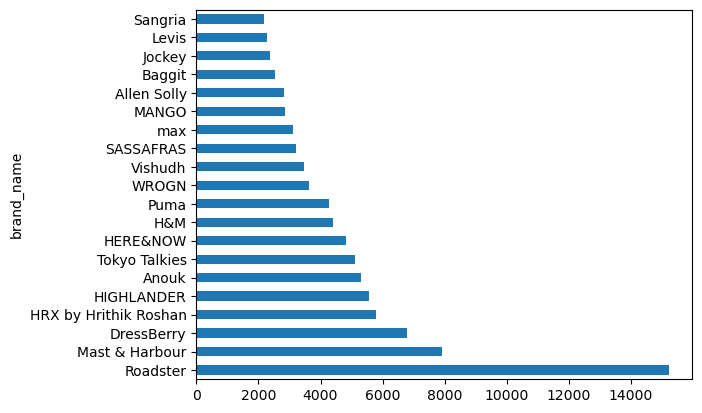

In [103]:
myntra.groupby(['brand_name'])["rating"].sum().nlargest(20).plot(kind='barh')

<Axes: ylabel='brand_name'>

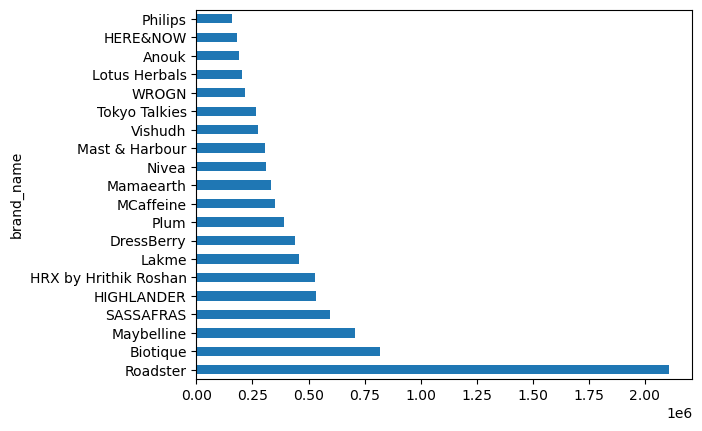

In [6]:
myntra.groupby(['brand_name'])["rating_count"].sum().nlargest(20).plot(kind='barh')
# for Roadster the top 10 average rating of atleast 100 (Eg.,) - sort the output

<Axes: ylabel='rating'>

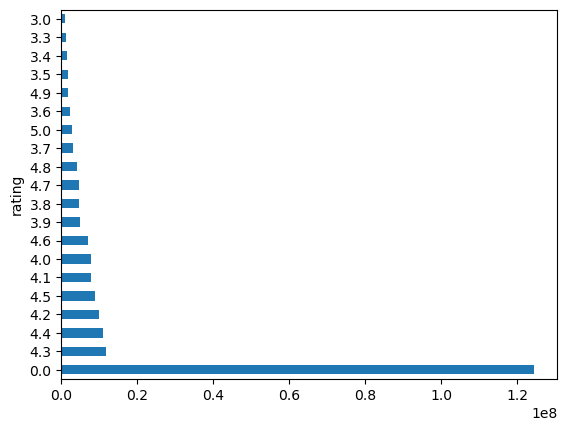

In [104]:
myntra.groupby(['rating'])["discounted_price"].sum().nlargest(20).plot(kind='barh')
# top categories
# top brands
# top products
# use UDF -> popularity based recommendation

# Text Analysis

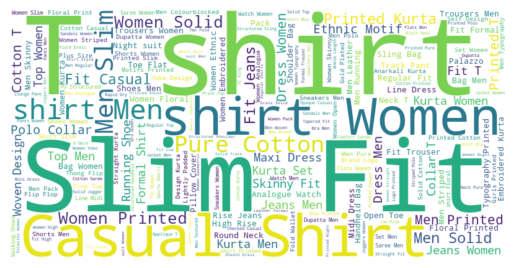

In [105]:
! pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(myntra['product_name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Filter out the "0" values in the rating column
filtered_ratings = myntra[myntra['rating'] != 0.0]['rating']
average_rating = filtered_ratings.mean()
print("Rating given is:", average_rating)

Rating given is: 4.165465412867135


In [20]:
#Groupby all products together and find their mean ratings
myntra.groupby('product_name')['rating'].mean().head()

product_name
#03 Perfume - 40 ml         3.7
+ Size Peplum Blouse        0.0
-Solid Blouson Top          0.0
0.3% Ceramides Cream 30g    4.4
0.3% Retinol Serum          4.2
Name: rating, dtype: float64

In [22]:
#Sort products based on ratings from highest to lowest
myntra.groupby('product_name')['rating'].mean().sort_values(ascending=False)

product_name
Men Checked Single-Breasted Slim-Fit 2-Piece Party Suit    5.0
Striped Halter Neck Fitted Top                             5.0
Striped Lightweight Puffer Jacket                          5.0
Fashion                                                    5.0
Women Striped Raw Edge Loose T-shirt                       5.0
                                                          ... 
Two-Piece Tie-Detail Dress                                 0.0
Two-strand necklace                                        0.0
Men Textured Sandals                                       0.0
Typography Bra Top & Vest                                  0.0
Set Of 6 Woven Table Placemats                             0.0
Name: rating, Length: 46013, dtype: float64

In [23]:
#Recommend top n popular products
n = 10
myntra.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)

product_name
Men Checked Single-Breasted Slim-Fit 2-Piece Party Suit    5.0
Striped Halter Neck Fitted Top                             5.0
Striped Lightweight Puffer Jacket                          5.0
Fashion                                                    5.0
Women Striped Raw Edge Loose T-shirt                       5.0
Striped Off Shoulder Top                                   5.0
Gel Moisturizer Face Cream                                 5.0
Men Pack of 2 Printed Cotton Basic Briefs                  5.0
Fairytale Creamy Body Scrub                                5.0
Intenso Eau De Parfum 60ml                                 5.0
Name: rating, dtype: float64

# 4.2 brand_name (Categorical column)

In [148]:
brand_name_counts = myntra['brand_name'].value_counts()
print(brand_name_counts)

Roadster          4557
Mast & Harbour    2398
DressBerry        2077
H&M               1998
Anouk             1785
                  ... 
deconstruct          1
FLUID                1
Plume                1
ALC Creations        1
LIL PITAARA          1
Name: brand_name, Length: 3194, dtype: int64


In [151]:
# Select only the top 5 value counts
top_5_brand_counts = brand_name_counts.head()
top_5_brand_counts

Roadster          4557
Mast & Harbour    2398
DressBerry        2077
H&M               1998
Anouk             1785
Name: brand_name, dtype: int64

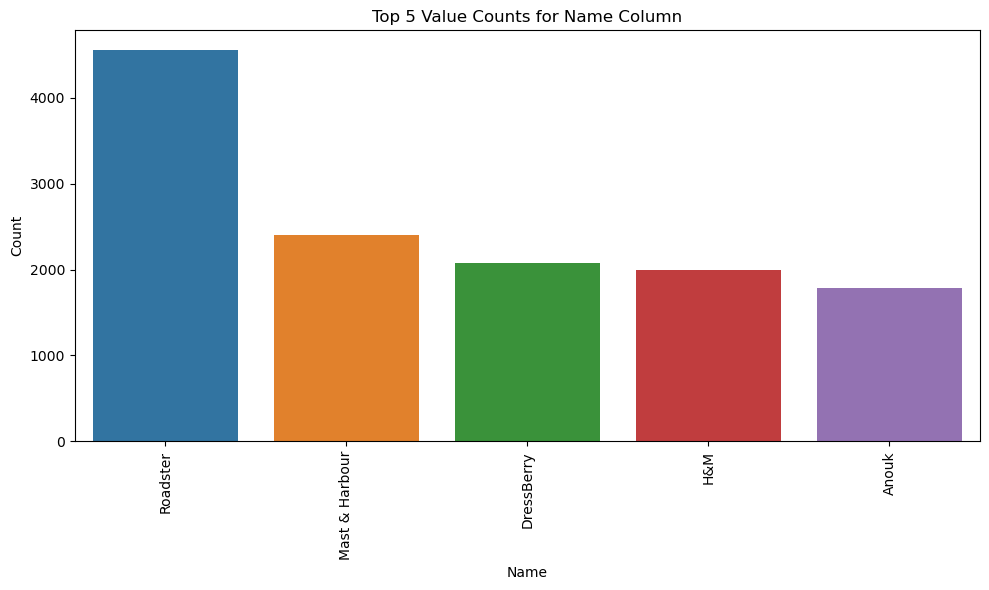

In [152]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_brand_counts.index, y=top_5_brand_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 Value Counts for Name Column')
plt.tight_layout()

# Display the plot
plt.show()

The top 5 brands on Myntra are as folows:
1. Roadster          4557
2. Mast & Harbour    2398
3. DressBerry        2077
4. H&M               1998
5. Anouk             1785

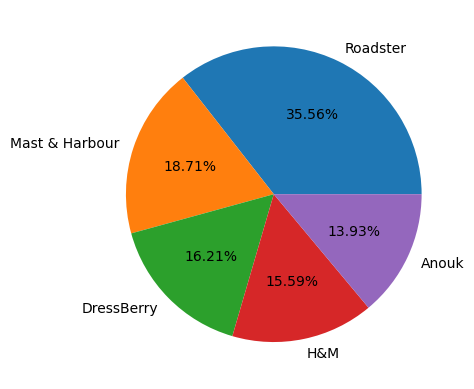

In [217]:
# displays brand-wise total count
brand_names = myntra['brand_name'].value_counts().head().index
brand_names
brand_values = myntra['brand_name'].value_counts().head().values
brand_values
plt.pie(brand_values[:5],labels=brand_names[:5],autopct='%1.2f%%')
plt.show()

Observation: The brand which is sold the most on Myntra is 'Roadster' followed by 'Mast & Harbour' & 'Dressberry'

In [265]:
df['product_name'].value_counts().nsmallest(10)

Men Typography Colourblocked Applique Slim Fit T-shirt    1
Boys Superman Slim Fit Pure Cotton T-shirt                1
Women Running Slim Fit Joggers                            1
Men Black Slim Fit Shirt                                  1
Polo-neck top Slim Fit                                    1
Slim Fit Henley T-shirt                                   1
Twill Trousers Slim Fit                                   1
Men Printed Slim Fit Formal Shirt                         1
Boys Washed Slim Fit Denim Shorts                         1
Men Slim Fit Casual T-shirt                               1
Name: product_name, dtype: int64

In [24]:
#Groupby all brands together and find their mean ratings
myntra.groupby('brand_name')['rating'].mean().head()

brand_name
1 Stop Fashion    5.000000
1st Step          0.000000
20Dresses         1.335756
39 THREADS        0.260000
3PIN              4.200000
Name: rating, dtype: float64

In [25]:
#Sort the brands based on ratings from highest to lowest
myntra.groupby('brand_name')['rating'].mean().sort_values(ascending=False)

brand_name
1 Stop Fashion               5.0
Joseph Joseph                5.0
Ozone Ayurvedics             5.0
Pasabahce                    5.0
Pro-Ethic STYLE DEVELOPER    5.0
                            ... 
Proyog                       0.0
Proline                      0.0
EUME                         0.0
EVADICT By Decathlon         0.0
zink Z                       0.0
Name: rating, Length: 3194, dtype: float64

In [26]:
#Recommend top n popular brands
n = 10
myntra.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10)

brand_name
1 Stop Fashion               5.0
Joseph Joseph                5.0
Ozone Ayurvedics             5.0
Pasabahce                    5.0
Pro-Ethic STYLE DEVELOPER    5.0
MILDCARES                    5.0
BEAUTY GLAZED                5.0
NISRAG HOME                  4.9
Labonita                     4.9
Instabuyz                    4.9
Name: rating, dtype: float64

How many users have rated a given brand ?

In [31]:
myntra['brand_name'].value_counts()

Roadster              4982
Mast & Harbour        2640
DressBerry            2330
H&M                   2188
max                   2045
                      ... 
SUBEA By Decathlon       1
asa                      1
TYMO                     1
MUFFLY                   1
LIL PITAARA              1
Name: brand_name, Length: 3194, dtype: int64

How many users have rated a given product ?

In [33]:
myntra['product_name'].value_counts()

Slim Fit Casual Shirt             2172
Men Slim Fit Jeans                1443
Men Running Shoes                 1135
Women Open Toe Flats              1022
Men Slim Fit Casual Shirt          911
                                  ... 
Women Solid Necklace                 1
Checked Midi Tie-Up Neck Dress       1
Set of 2 Pillow Cover                1
Contour De Force Mini Blush 4g       1
Solid Twill Seat Cushion             1
Name: product_name, Length: 46013, dtype: int64

What is product rating and how many people voted for this ?

In [36]:
#First create a DataFrame
data = pd.DataFrame(myntra.groupby('product_name')['rating'].mean())
data['rating_count'] = pd.DataFrame(myntra['product_name'].value_counts())
#data['rating_counts'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count()) #either of the 2 codes
data.head()

rating  rating_count
product_name                                  
#03 Perfume - 40 ml          3.7             1
+ Size Peplum Blouse         0.0             1
-Solid Blouson Top           0.0             2
0.3% Ceramides Cream 30g     4.4             1
0.3% Retinol Serum           4.2             1

# Weighted Average - Using this for each product/brand's average rating

In [38]:
myntra.columns

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_link', 'img_link', 'product_tag',
       'brand_tag', 'discount_amount', 'discount_percent'],
      dtype='object')

In [40]:
# no. votes for the product
v = myntra['rating_count']

In [41]:
# avg for the product as a number from 0 to 10 (mean) = Rating
R = myntra['rating']

In [42]:
# the mean votes across the whole report
C = myntra['rating'].mean()

In [44]:
# minimum votes required to be listed in the Top 250
m = myntra['rating_count'].quantile(0.70)

In [45]:
myntra['weighted_average'] = ((R*v) + (C*m)) / (v+m)

In [46]:
myntra['weighted_average'].head()

0    2.264556
1    3.624285
2    3.808686
3    2.264556
4    2.264556
Name: weighted_average, dtype: float64

In [52]:
myntra[['product_name','rating','rating_count','weighted_average']].sort_values('weighted_average',ascending=False).head(50)

product_name  rating  \
86267                        Signature Coffee Body Washes     4.8   
108572                     Exfoliating Espresso Body Wash     4.8   
62042                            Extra Virgin Coconut Oil     5.0   
3877                    Geometric Leather Two Fold Wallet     4.8   
22080                        Naked & Raw Coffee Hair Mask     4.9   
84536                             Coffee Hair Conditioner     4.8   
84538                             Coffee Hair Conditioner     4.8   
152449                       Moisture Surge 100H Hydrator     4.8   
105779                                Men Two Fold Wallet     4.7   
141365                     Sustain Pure Rose Water 200 ml     4.7   
150887                        Signature Coffee Moment Kit     4.7   
104637                      Solid Leather Two Fold Wallet     4.7   
67756                           Unisex Diamond Facial Kit     4.9   
8456                        Cappuccino Coffee Bathing Bar     4.7   
161218                     Saffron Facial Cleanser 200 ml     4.7   
164418                      Latte Coffee Bathing Bar Soap     4.7   
164429                      Latte Coffee Bathing Bar Soap     4.7   
66227                      Signature Coffee Mood Gift Kit     4.7   
107717                      Leather Solid Two Fold Wallet     4.7   
142660                              Unisex Solid Backpack     4.7   
152637                         Contemporary Drop Earrings     4.7   
108693                             Embellished Box Clutch     4.7   
32997                          Hair Loss Control Hair Oil     5.0   
59953                          Hair Loss Control Hair Oil     5.0   
18585                          Aquaholic Water Boost Mask     4.7   
108506                        Men Two Fold Leather Wallet     4.7   
80744                          2 in 1 Bestseller Gift Box     4.7   
107113                     Eucalyptus Spearmint Body Wash     4.8   
152084                        Men Leather Two Fold Wallet     4.7   
91862                              Women Stretchable Belt     4.7   
4621                            Women High Top Snow Boots     4.7   
48129                       Exfoliating Body & Face Combo     4.6   
62672                         Body Toning & Polishing Kit     4.6   
136680                         Mascara & 2 Eyeconic Kajal     4.6   
131999                            Cellulite Reduction Duo     4.6   
131974                            Cellulite Reduction Duo     4.6   
64472                                  Body Polishing Kit     4.6   
98970                       Body & Face Exfoliation Combo     4.6   
119813                         Exfoliating Shower Routine     4.6   
105884                            Set of 2 Eyeconic Kajal     4.6   
18507                             Set of 6 Eyeconic Kajal     4.6   
105108                      Exfoliating Coffee Body Scrub     4.6   
116969                      Coffee Body Scrub - Pack of 2     4.6   
120918                      Set of 2 Nail Colour Removers     4.6   
142437                          Nail Colour Remover 27 ml     4.6   
42271                         Set of 2 Roll-On Deodorants     4.6   
104406                        Eyeconic Kajal - Deep Black     4.6   
108479                            British Rose Shower Gel     4.6   
144849  Unisex Pack Of 2 Solid 7-Ply Protective Outdoo...     4.6   
167014                      Coffee-Choco Moisturizing Set     4.6   

        rating_count  weighted_average  
86267           1600          4.767153  
108572          1000          4.747851  
62042            201          4.741242  
3877             580          4.711407  
22080            268          4.708497  
84536            480          4.693724  
84538            480          4.693724  
152449           409          4.676176  
105779          1800          4.671914  
141365          1400          4.664008  
150887          1200          4.658113  
104637          1100          4.6

# best products by average votes

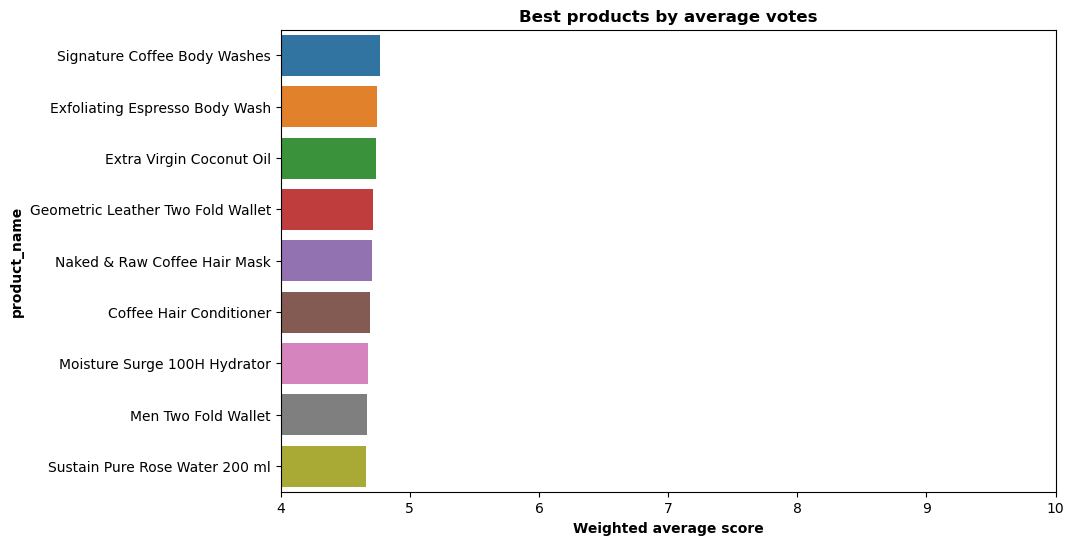

In [60]:
weight_average = myntra.sort_values('weighted_average',ascending=False)
plt.figure(figsize = (10,6))
axis1 = sns.barplot(x=weight_average['weighted_average'].head(10), y = weight_average['product_name'].head(10))
plt.xlim(4,10)
plt.title('Best products by average votes', weight = 'bold')
plt.xlabel('Weighted average score', weight = 'bold')
plt.ylabel('product_name', weight = 'bold')
plt.savefig('best_products.png')

# 4.3 rating (Numeric column)

In [154]:
# Summary Statistics
myntra['rating'].describe()

count    146611.000000
mean          2.317154
std           2.097438
min           0.000000
25%           0.000000
50%           3.600000
75%           4.300000
max           5.000000
Name: rating, dtype: float64

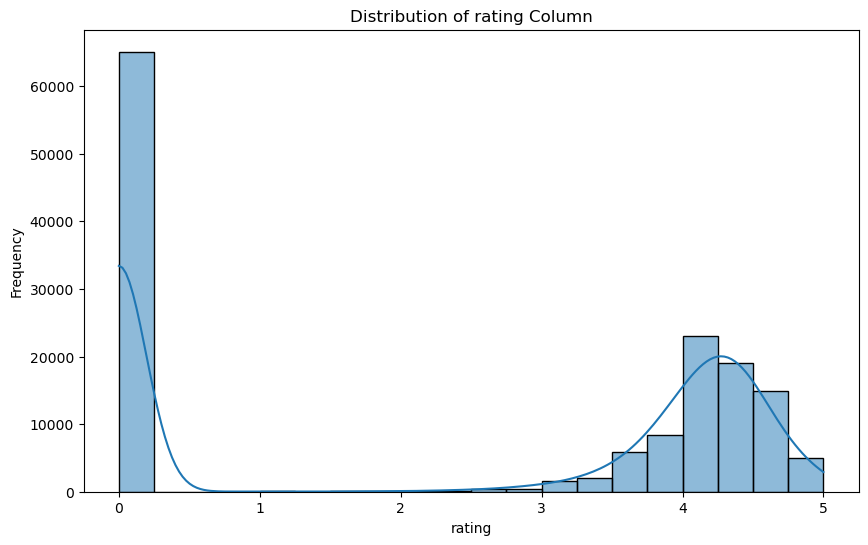

In [175]:
# Distribution Visualization
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(myntra['rating'], bins=20, kde=True)

# Set labels and title
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Distribution of rating Column')

# Display the plot
plt.show()

From the above graph we can assume that most of the product didn't receive any rating and were given a base rating of zero. Therefore, we can exclude the zero rating

In [155]:
# Filter out the "0" values in the rating column
filtered_ratings = myntra[myntra['rating'] != 0.0]['rating']
average_rating = filtered_ratings.mean()
print("Rating given is:", average_rating)

Rating given is: 4.167938116503901


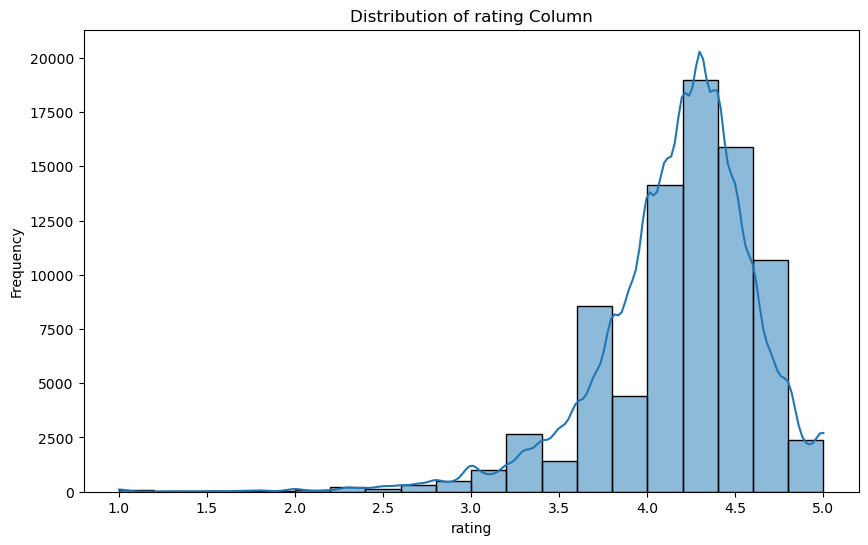

In [160]:
# Distribution Visualization
# Create a histogram with 'filtered_ratings'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_ratings, bins=20, kde=True)

# Set labels and title
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Distribution of rating Column (excluding zero)')

# Display the plot
plt.show()

Maximum ratings fall between 4.0 and 4.8

Let's apply Logarithmic transformation for better understanding of a data distribution

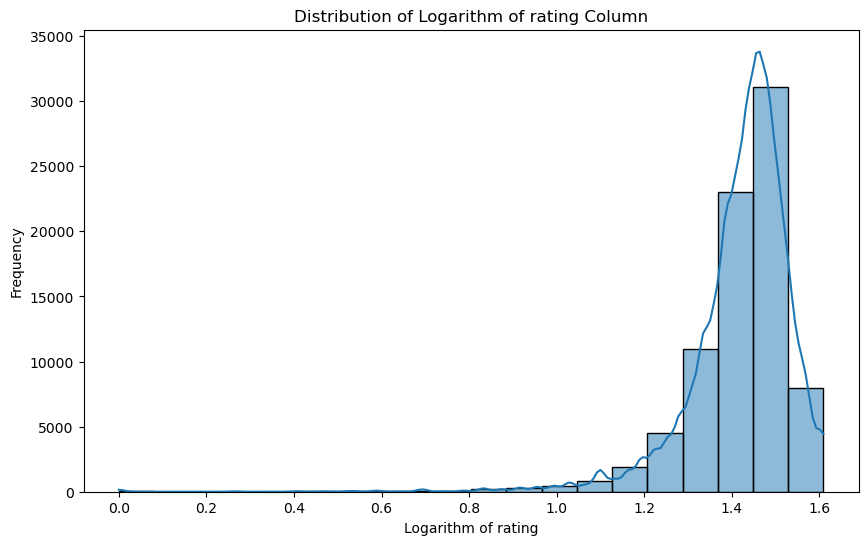

In [176]:
# Apply logarithmic transformation
log_rating = np.log(filtered_ratings)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_rating, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of rating')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of rating Column')

# Display the plot
plt.show()

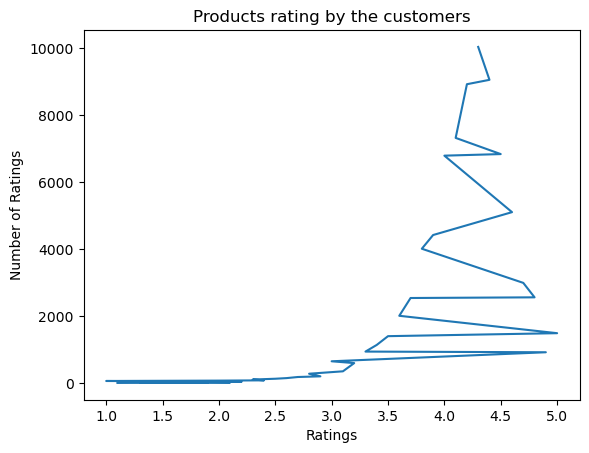

In [225]:
# Draw a line chart
plt.plot(filtered_ratings.value_counts())
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.title('Products rating by the customers')
plt.show(block=True);

What about the outliers/extreme values?

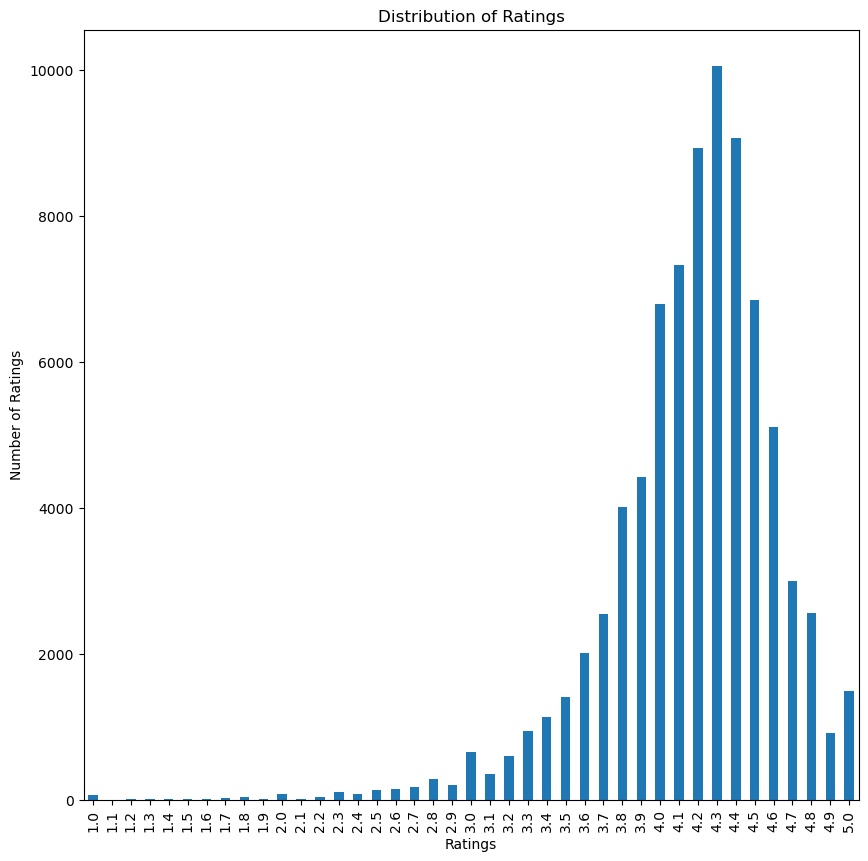

In [231]:
import matplotlib.pyplot as plt
filtered_ratings.value_counts().sort_index().plot(kind='bar', figsize=(10, 10))
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')
plt.show()

We can see that histogram is skewed towards the right, which means that most of the products have a higher rating

In [237]:
# The max rating of how much has been given by the customers?

# 4.4 rating_count (Numeric column)

In [165]:
myntra['rating_count'].describe()

count    146611.000000
mean        123.589219
std         817.995615
min           0.000000
25%           0.000000
50%           6.000000
75%          34.000000
max       55900.000000
Name: rating_count, dtype: float64

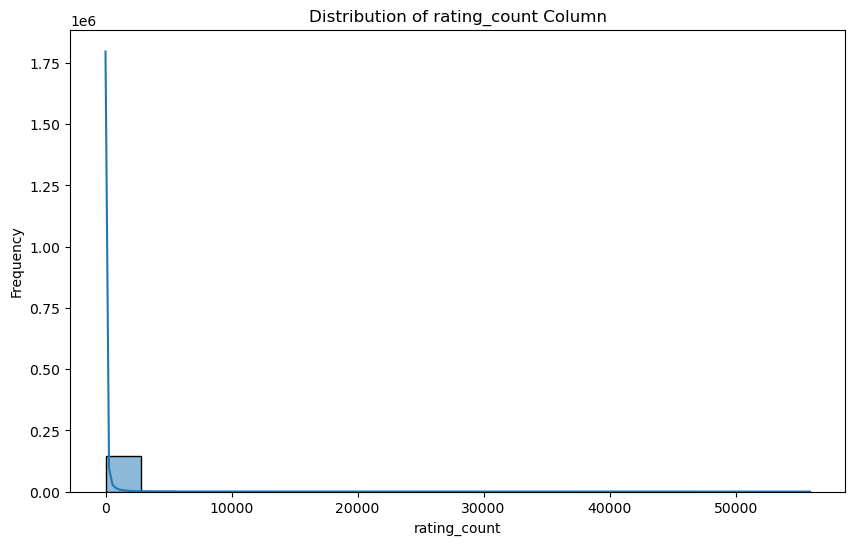

In [166]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(myntra['rating_count'], bins=20, kde=True)

# Set labels and title
plt.xlabel('rating_count')
plt.ylabel('Frequency')
plt.title('Distribution of rating_count Column')

# Display the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of a data distribution

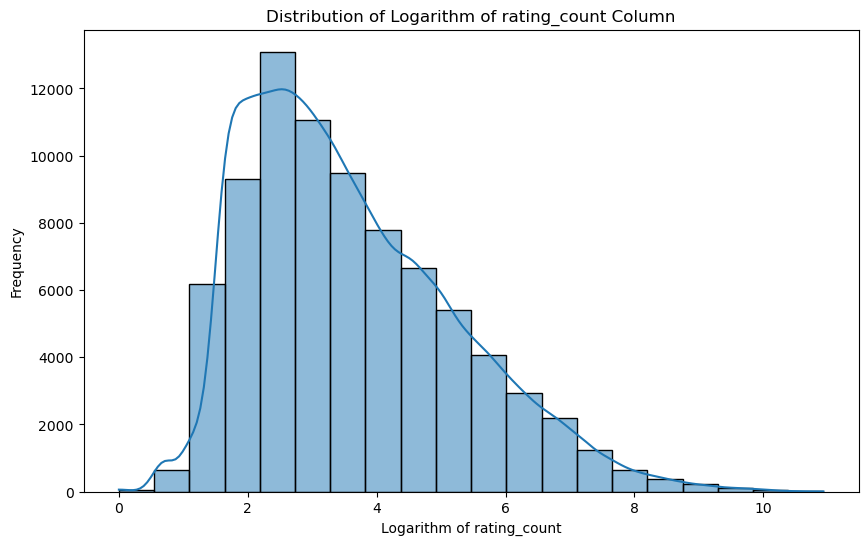

In [177]:
# Apply logarithmic transformation
log_rating_count = np.log(myntra['rating_count'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_rating_count, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of rating_count')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of rating_count Column')

# Display the plot
plt.show()

In [180]:
top_10_products = myntra.nlargest(10, 'rating_count')
print(top_10_products[['product_name', 'rating_count']])

                              product_name  rating_count
33432            Unisex Skin Care Gift Set         55900
59424               Kajal & Bold Liner Set         54600
128773           Unisex Skin Care Gift Set         51000
104447  Printed Cotton Pure Cotton T-shirt         49300
108846                  Skin Care Gift Set         39100
75597        Toner-Cream-Serum-Night Cream         38600
160063        Set of Foundation & Eyeliner         37000
83734            Set of Eyeliner & Mascara         36200
55661       Sustainable Skin Care Gift Set         35300
164299              Set Of Toner & Eye Gel         32600


The highest rating counts are given for the following products across the dataset
1.  Unisex Skin Care Gift Set          55900
2.  Kajal & Bold Liner Set             54600
3.  Unisex Skin Care Gift Set          51000
4.  Printed Cotton Pure Cotton T-shirt 49300
5.  Skin Care Gift Set                 39100
6.  Toner-Cream-Serum-Night Cream      38600
7.  Set of Foundation & Eyeliner       37000
8.  Set of Eyeliner & Mascara          36200
9.  Sustainable Skin Care Gift Set     35300
10. Set Of Toner & Eye Gel             32600

In [184]:
top_10_product_brands = myntra.nlargest(10, 'rating_count')
print(top_10_product_brands[['brand_name', 'rating_count']])

                   brand_name  rating_count
33432                Biotique         55900
59424              Maybelline         54600
128773               Biotique         51000
104447  HRX by Hrithik Roshan         49300
108846               Biotique         39100
75597                Biotique         38600
160063             Maybelline         37000
83734              Maybelline         36200
55661                Biotique         35300
164299               Biotique         32600


The highest rating counts are given for the following brands across the dataset
1.  Biotique         55900
2.  Maybelline         54600
3.  Biotique         51000
4. HRX by Hrithik Roshan         49300
5.  Biotique         39100
6.  Biotique         38600
7. Maybelline         37000
8. Maybelline         36200
9. Biotique         35300
10. Biotique         32600

Highest Rated Product - products with the highest rating, considering the 'rating' column as the primary criterion and the 'rating_count' column as the secondary criterion in case of a tie

In [207]:
top_rated_products = myntra.sort_values(by=['rating', 'rating_count'], ascending=[False, False])
top_rated_products = top_rated_products.head(10)
print(top_rated_products[['brand_name','product_name','rating','rating_count']])

             brand_name                    product_name  rating  rating_count
62042   Organic Harvest        Extra Virgin Coconut Oil     5.0           201
32997   Organic Harvest      Hair Loss Control Hair Oil     5.0           128
41277   Organic Harvest                       Argan Oil     5.0           105
152170   Tommy Hilfiger  Men Leather Accessory Gift Set     5.0            30
73921      TIED RIBBONS          Ganesha Idol with Tray     5.0            27
92171         Innisfree          Set of Serum & Ampoule     5.0            26
106559        Innisfree  Green Tea Seed Face Serum 80ml     5.0            26
142766   Tommy Hilfiger  Women Textured Two Fold Wallet     5.0            26
101599      Solethreads            Men Thong Flip-Flops     5.0            25
14825             Metro            Women Open Toe Flats     5.0            24


# 4.5 marked_price (Numeric column)

In [168]:
myntra['marked_price'].describe()

count    146611.000000
mean       2525.860379
std        2437.720930
min          50.000000
25%        1299.000000
50%        1999.000000
75%        2999.000000
max      113999.000000
Name: marked_price, dtype: float64

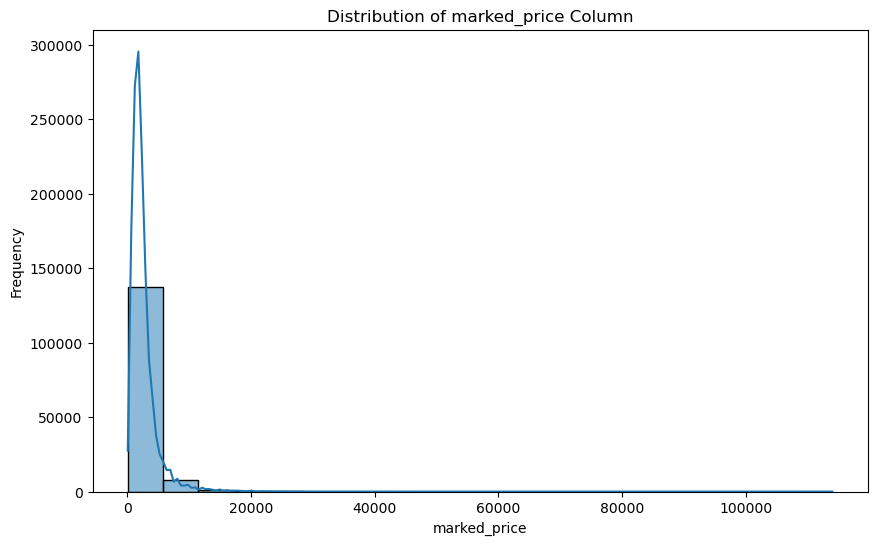

In [169]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(myntra['marked_price'], bins=20, kde=True)

# Set labels and title
plt.xlabel('marked_price')
plt.ylabel('Frequency')
plt.title('Distribution of marked_price Column')

# Display the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of a data distribution

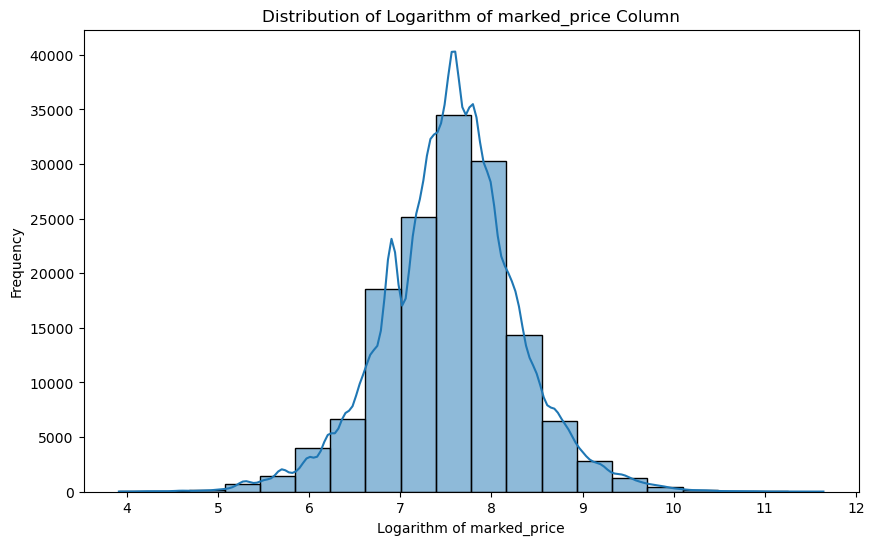

In [178]:
# Apply logarithmic transformation
log_marked_price = np.log(myntra['marked_price'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_marked_price, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of marked_price')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of marked_price Column')

# Display the plot
plt.show()

# 4.6 discounted_price (Numeric column)

In [172]:
myntra['discounted_price'].describe()

count    146611.000000
mean       1532.622675
std        1842.427134
min          49.000000
25%         679.000000
50%        1012.000000
75%        1749.000000
max       45900.000000
Name: discounted_price, dtype: float64

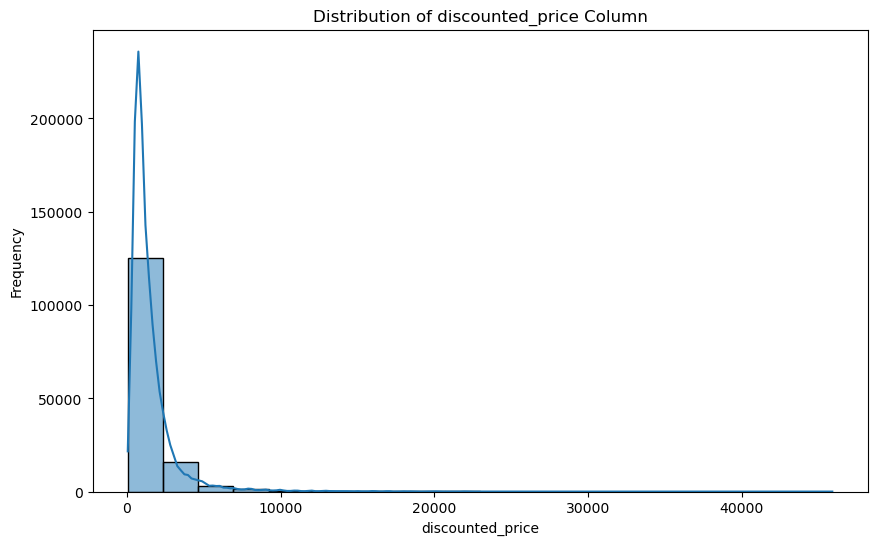

In [173]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(myntra['discounted_price'], bins=20, kde=True)

# Set labels and title
plt.xlabel('discounted_price')
plt.ylabel('Frequency')
plt.title('Distribution of discounted_price Column')

# Display the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of a data distribution

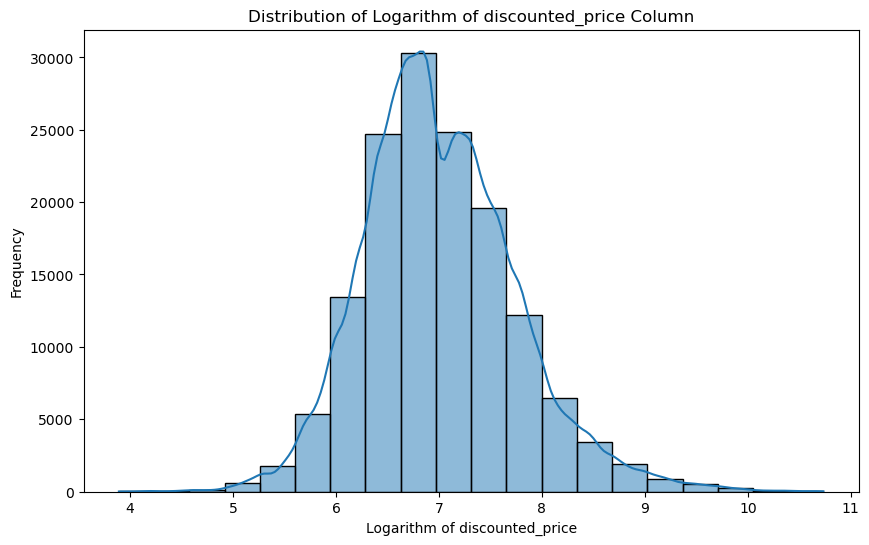

In [183]:
# Apply logarithmic transformation
log_discounted_price = np.log(myntra['discounted_price'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_discounted_price, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of discounted_price')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of discounted_price Column')

# Display the plot
plt.show()

In [185]:
top_10_products = myntra.nlargest(10, 'discounted_price')
print(top_10_products[['product_name', 'discounted_price']])

                                     product_name  discounted_price
29599                  Men Automatic Motion Watch             45900
27039                      Lord Krishna Showpiece             45599
65674   Ready to Wear Lehenga Blouse With Dupatta             45000
107767               Airwrap Complete Hair Styler             44900
77688                    Women Aviator Sunglasses             43900
118738                                      Women             43900
149277                    Women Cateye Sunglasses             43900
64803                        Women Analogue Watch             43500
102961                    Women Cateye Sunglasses             42900
13309                     Women Square Sunglasses             41900


In [22]:
top_3_products = myntra.nlargest(3, 'discounted_price')
print(top_3_products[['product_name', 'discounted_price']])

                                    product_name  discounted_price
29599                 Men Automatic Motion Watch             45900
27039                     Lord Krishna Showpiece             45599
65674  Ready to Wear Lehenga Blouse With Dupatta             45000


The maximum discounts have been given on the following products
1. Men Automatic Motion Watch             45900
2. Lord Krishna Showpiece             45599
3. Ready to Wear Lehenga Blouse With Dupatta             45000
4. Airwrap Complete Hair Styler             44900
5. Women Aviator Sunglasses             43900
6. Women             43900
7. Women Cateye Sunglasses             43900
8. Women Analogue Watch             43500
9. Women Cateye Sunglasses             42900
10. Women Square Sunglasses             41900

In [28]:
top_3_product_brands = myntra.nlargest(3, 'discounted_price')
print(top_3_product_brands[['brand_name', 'discounted_price']])

        brand_name  discounted_price
29599    D1 Milano             45900
27039  eCraftIndia             45599
65674       Masaba             45000


The maximum discounts have been given on the following brands

1. D1 Milano             45900
2. CraftIndia             45599
3.  Masaba             45000
4.         dyson             44900
5.      Tom Ford             43900
6.     Tom Ford             43900
7.  Tom Ford             43900
8.         TISSOT             43500
9.     Tom Ford             42900
10.      Tom Ford             41900

In [198]:
myntra.columns
# myntra[['discounted_price','discount_amount']]

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_tag', 'brand_tag',
       'discount_amount', 'discount_percent'],
      dtype='object')

# 4.7 product_tag (Categorical column)

In [189]:
count = myntra['product_tag'].value_counts()
print(count)

tshirts            14909
shirts             10664
dresses            10360
tops                7781
kurta-sets          7163
                   ...  
bakeware               1
wristbands             1
electric-kettle        1
charms                 1
kaleeras               1
Name: product_tag, Length: 341, dtype: int64


In [190]:
# Select only the top 5 value counts
top_5_counts = count.head()
top_5_counts

tshirts       14909
shirts        10664
dresses       10360
tops           7781
kurta-sets     7163
Name: product_tag, dtype: int64

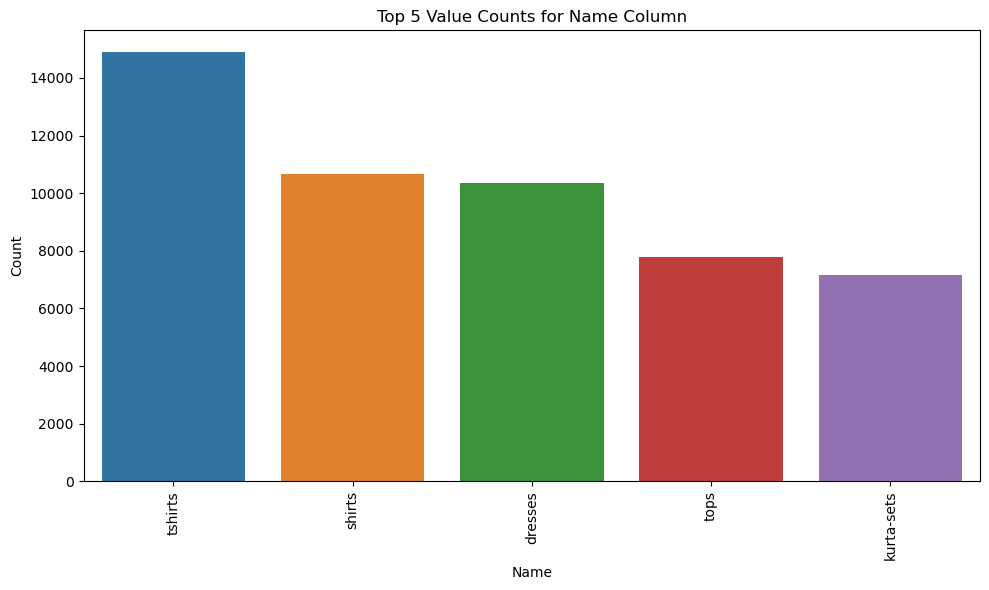

In [191]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_counts.index, y=top_5_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 Value Counts for Name Column')
plt.tight_layout()

# Display the plot
plt.show()

Top products sold on Myntra are as follows
1. tshirts       
2. shirts        
3. dresses       
4. tops           
5. kurta-sets

# 4.8 brand_tag (Categorical column)

In [25]:
count = myntra['brand_tag'].value_counts()
print(count)

roadster         4557
mast--harbour    2398
dressberry       2077
hm               1998
anouk            1785
                 ... 
fabclub             1
converse            1
modriba             1
asa                 1
mark-home           1
Name: brand_tag, Length: 3194, dtype: int64


In [26]:
# Select only the top 5 value counts
top_5_counts = count.head()
top_5_counts

roadster         4557
mast--harbour    2398
dressberry       2077
hm               1998
anouk            1785
Name: brand_tag, dtype: int64

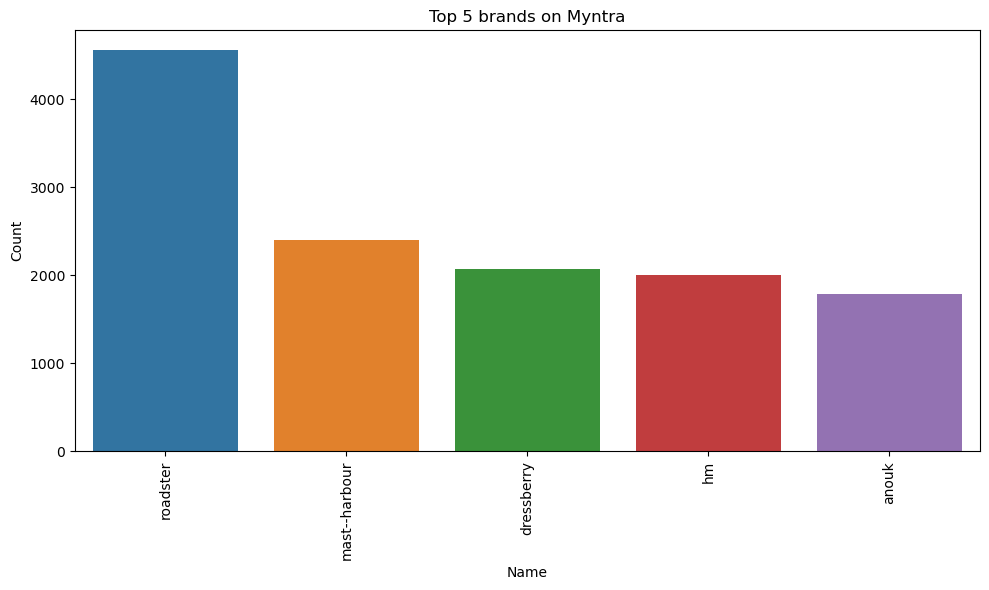

In [27]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_counts.index, y=top_5_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 brands on Myntra')
plt.tight_layout()

# Display the plot
plt.show()

Here we see the top 5 brands on Myntra
1. roadster         
2. mast--harbour    
3. dressberry       
4. hm               
5. anouk   

# 4.9 discount_amount (Numeric column)

In [202]:
myntra.columns

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_tag', 'brand_tag',
       'discount_amount', 'discount_percent'],
      dtype='object')

In [203]:
myntra[['discount_amount','discounted_price']]

discount_amount  discounted_price
0                   467               828
1                   715               584
2                   400              1599
3                    60               539
4                     0              2899
...                 ...               ...
167987             3000              1999
167988             1220               779
167989             1125              1374
167990             1500              1499
167991                0               399

[146611 rows x 2 columns]

In [204]:
myntra['discount_amount'].describe()

count    146611.000000
mean        993.237704
std        1235.525991
min           0.000000
25%         210.000000
50%         702.000000
75%        1317.000000
max       68400.000000
Name: discount_amount, dtype: float64

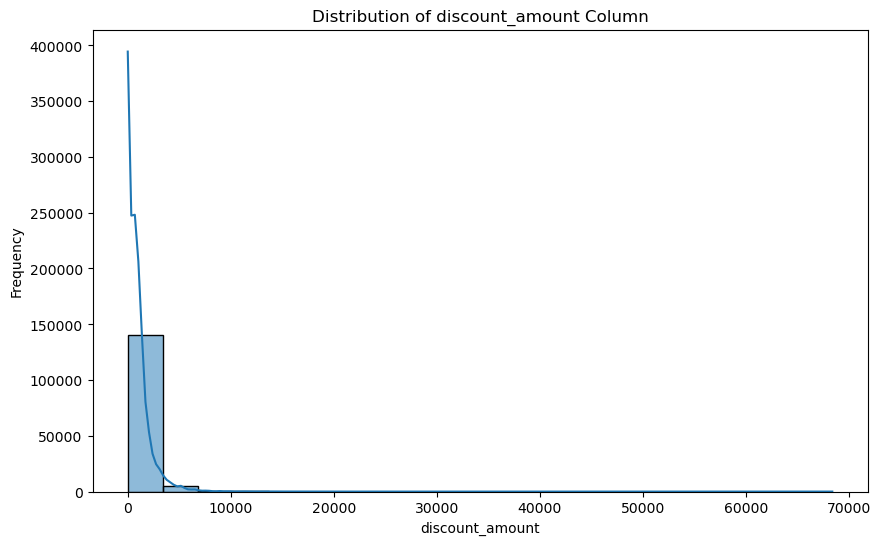

In [205]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(myntra['discount_amount'], bins=20, kde=True)

# Set labels and title
plt.xlabel('discount_amount')
plt.ylabel('Frequency')
plt.title('Distribution of discount_amount Column')

# Display the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of a data distribution

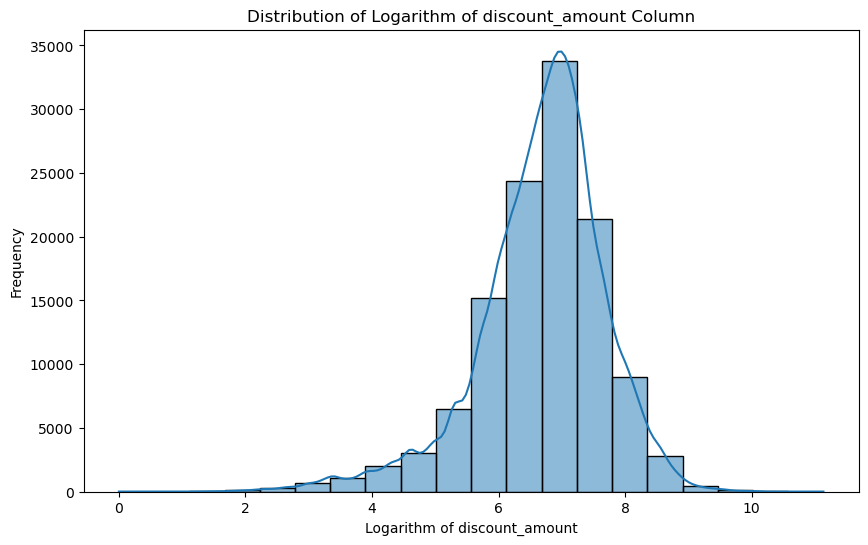

In [206]:
# Apply logarithmic transformation
log_discount_amount = np.log(myntra['discount_amount'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_discount_amount, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of discount_amount')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of discount_amount Column')

# Display the plot
plt.show()

# 4.10 discount_percent (Numeric column)

In [199]:
myntra['discount_percent'].describe()

count    146611.000000
mean         37.147765
std          24.594289
min           0.000000
25%          15.000000
50%          40.000000
75%          59.000000
max          91.000000
Name: discount_percent, dtype: float64

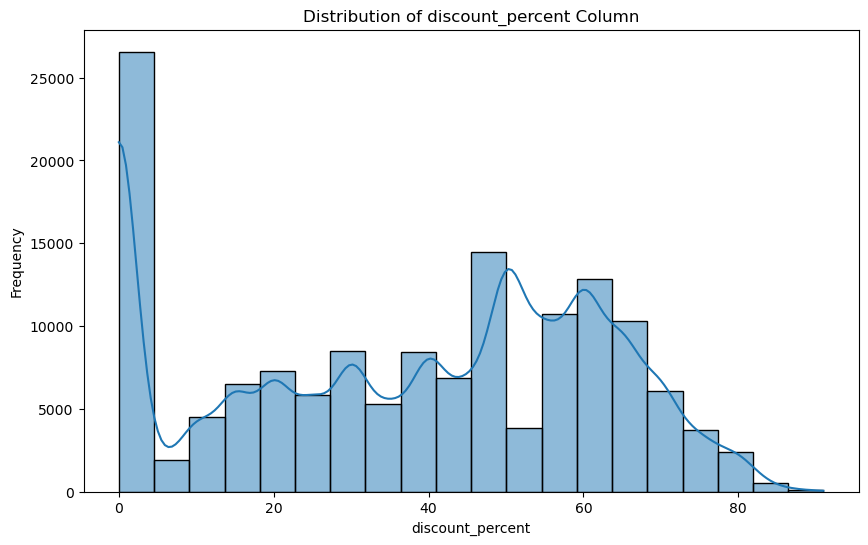

In [200]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(myntra['discount_percent'], bins=20, kde=True)

# Set labels and title
plt.xlabel('discount_percent')
plt.ylabel('Frequency')
plt.title('Distribution of discount_percent Column')

# Display the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of a data distribution

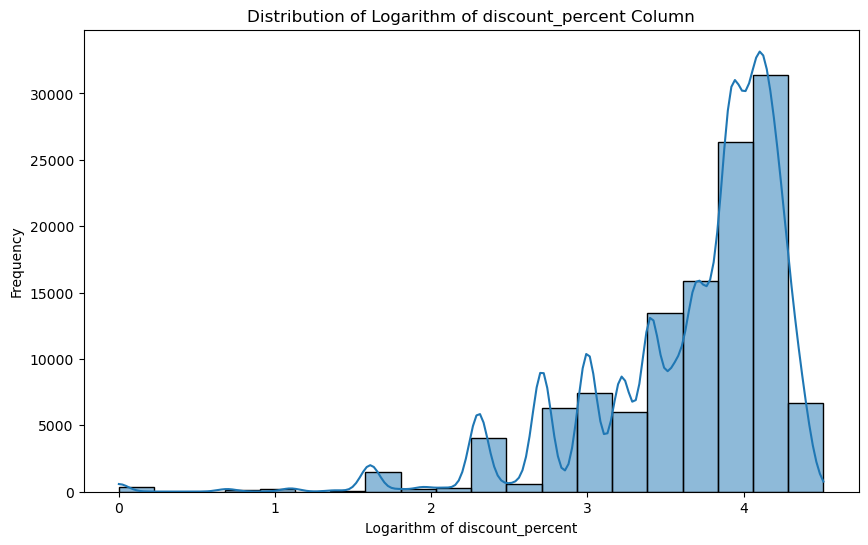

In [201]:
# Apply logarithmic transformation
log_discount_percent = np.log(myntra['discount_percent'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_discount_percent, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of discount_percent')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of discount_percent Column')

# Display the plot
plt.show()

# Popularity based model - Popularity based RS

Popularity can be built using ratings
One way to measure the popularity of the item is 
* based on how popular they are OR how many users are buying the specific item - =Hot-Selling=
* based on the number of votes/reviews/likes/ratings - =Highest-Rated=

# How to build the popularity recommendation model/system in PYTHON?

In [15]:
# Filter out the "0" values in the rating column
filtered_ratings = myntra[myntra['rating'] != 0.0]['rating']
average_rating = filtered_ratings.mean()
print("Rating given is:", average_rating)

Rating given is: 4.167938116503901


In [16]:
# create a new column that stores the popularity of each item
myntra['popularity'] = filtered_ratings.mean()

In [17]:
# A new column 'popularity' has been created/added to the dataset
myntra.head()

product_name      brand_name  rating  rating_count  \
0   Croc Textured Two Fold Wallet     Lino Perros     0.0             0   
1             Men Striped Sliders  Mast & Harbour     4.0            76   
2            Printed A-line Kurta            Biba     4.3            66   
3    Girls Floral Printed T-shirt        Anthrilo     0.0             0   
4  Women Printed Kurta with Skirt    FASHION DWAR     0.0             0   

   marked_price  discounted_price                      sizes product_tag  \
0          1295               828                    Onesize     wallets   
1          1299               584  UK6,UK7,UK8,UK9,UK10,UK11  flip-flops   
2          1999              1599           S,M,L,XL,XXL,3XL      kurtas   
3           599               539            7-8Y,8-9Y,9-10Y     tshirts   
4          2899              2899                   S,M,L,XL  kurta-sets   

       brand_tag  discount_amount  discount_percent  popularity  
0    lino-perros              467                36    4.167938  
1  mast--harbour              715                55    4.167938  
2           biba              400                20    4.167938  
3       anthrilo               60                10    4.167938  
4   fashion-dwar                0                 0    4.167938

In [18]:
myntra = myntra.sort_values('popularity', ascending=False)

In [19]:
# Recommend the top N items to the user

def recommend_items(myntra, product_name, N):
  """Recommends the top N items to the user."""

  # Get the user's ratings.
  user_ratings = myntra[myntra['product_name'] == product_name]

  # Get the top N items by popularity.
  top_items = myntra.sort_values('popularity', ascending=False).head(N)

  # Return the top N items.
  return top_items

# Recommend the top 5 items to the user with ID 1.
top_items = recommend_items(myntra, 1, 5)

# Print the top 5 items.
top_items

product_name     brand_name  rating  rating_count  \
0       Croc Textured Two Fold Wallet    Lino Perros     0.0             0   
5            Floral Cotton Maxi Dress        Vishudh     4.1           800   
17          Gold-Plated Drop Earrings  Zaveri Pearls     4.3           168   
83  Printed Tasselled Envelope Clutch          Lavie     4.6           165   
8                Men Checked Pullover       Roadster     4.3           528   

    marked_price  discounted_price         sizes product_tag      brand_tag  \
0           1295               828       Onesize     wallets    lino-perros   
5           4349              1826  S,M,L,XL,XXL     dresses        vishudh   
17          2495               499       Onesize    earrings  zaveri-pearls   
83          1799              1079             S    clutches          lavie   
8           1999               999      S,M,L,XL    sweaters       roadster   

    discount_amount  discount_percent  popularity  
0               467                36    4.167938  
5              2523                58    4.167938  
17             1996                80    4.167938  
83              720                40    4.167938  
8              1000                50    4.167938

In [20]:
# Sort the DataFrame by 'rating_count' in descending order to find the most popular items
sorted_df = myntra.sort_values(by='rating_count', ascending=False)

# Display the top N most popular items
N = 3  # You can adjust this to show more or fewer items
top_N_popular_items = sorted_df.head(N)

print("Top", N, "popular items:")
top_N_popular_items

Top 3 popular items:


product_name  brand_name  rating  rating_count  \
33432   Unisex Skin Care Gift Set    Biotique     4.4         55900   
59424      Kajal & Bold Liner Set  Maybelline     4.5         54600   
128773  Unisex Skin Care Gift Set    Biotique     4.4         51000   

        marked_price  discounted_price sizes         product_tag   brand_tag  \
33432            803               602  Pack  skin-care-gift-set    biotique   
59424            429               386  Pack  kajal-and-eyeliner  maybelline   
128773           779               779  Pack  skin-care-gift-set    biotique   

        discount_amount  discount_percent  popularity  
33432               201                25    4.167938  
59424                43                10    4.167938  
128773                0                 0    4.167938

# Building a popularity based recommendation model in Python category-wise (for each brand name)

In [21]:
# Group the DataFrame by category
grouped = myntra.groupby('brand_name')

# Define a function to get the top N popular items within each category
def get_top_N_popular_items(group, N=1):
    sorted_group = group.sort_values(by='rating_count', ascending=False)
    return sorted_group.head(N)

# Apply the function to each group and concatenate the results
top_N_popular_items = pd.concat([get_top_N_popular_items(group, N=1) for _, group in grouped])

print("Top 1 popular item in each brand:")
top_N_popular_items

Top 1 popular item in each brand:


product_name      brand_name  \
39559                      Women Pack of 6 Printed Kurtas  1 Stop Fashion   
86222   Kids 5 in 1 Printed Carry Cot with Anti-Mosqui...        1st Step   
105074                     Floral Print Tiered Maxi Dress       20Dresses   
144154                              Men Solid Track Pants      39 THREADS   
36419                          Infant Boys Cotton Joggers            3PIN   
...                                                   ...             ...   
105286                      Pack of 6 Cotton Lounge Pants             x2o   
107313                           Women Textured Sling Bag          yelloe   
98156                              Women Thong Flip-Flops            yoho   
17766                           Women Solid Lounge Shorts            zebu   
101200              Women Conversational High-Rise Shorts          zink Z   

        rating  rating_count  marked_price  discounted_price  \
39559      5.0             2          5339              1334   
86222      0.0             0          2999              2699   
105074     4.5          1900          1995              1596   
144154     3.9             7           999               599   
36419      4.2             6           599               341   
...        ...           ...           ...               ...   
105286     4.1          2600          2999               989   
107313     4.3           929          2190               897   
98156      0.0             0           699               496   
17766      4.6           587           599               335   
101200     0.0             0          1699              1529   

                                                    sizes    product_tag  \
39559                                S,M,L,XL,XXL,3XL,4XL         kurtas   
86222                                             Onesize      carry-cot   
105074                                    XS,S,M,L,XL,XXL        dresses   
144154                                       S,M,L,XL,XXL    track-pants   
36419                                 9-12M,12-18M,18-24M    track-pants   
...                                                   ...            ...   
105286  0-3M,3-6M,6-9M,9-12M,12-18M,18-24M,2-3Y,3-4Y,4...   lounge-pants   
107313                                            Onesize       handbags   
98156                             UK3,UK4,UK5,UK6,UK7,UK8     flip-flops   
17766                                        S,M,L,XL,XXL  lounge-shorts   
101200                                     26,28,30,32,34         shorts   

             brand_tag  discount_amount  discount_percent  popularity  
39559   1-stop-fashion             4005                75    4.167938  
86222         1st-step              300                10    4.167938  
105074       20dresses              399                20    4.167938  
144154      39-threads              400                40    4.167938  
36419             3pin              258                43    4.167938  
...                ...              ...               ...         ...  
105286             x2o             2010                67    4.167938  
107313          yelloe             1293                59    4.167938  
98156             yoho              203                29    4.167938  
17766             zebu              264                44    4.167938  
101200          zink-z              170                10    4.167938  

[3194 rows x 12 columns]

More sophisticated algorithms are as follows

3. A content-based model with multiple methods 
    a . content can be built using description, name and brand. Uses NLP concepts to match the search string with the description

4. Hybrid model
5. Neural Network(LightFM)

# IGNORE THE BELOW CONTENTS

# Analyze numeric & categorical columns

In [ ]:
# groupby & rating and selecting top 10 rated products - popularity recomm
# Line chart
# plots for numerical and categorical features
# Popularity base recommendation - top 10 of everything - rated by certain number of people

In [102]:
# Which product and from what brand the rating is more
# can use reset_index() to convert to dataframe instead of pd.DataFrame
new_group = pd.DataFrame(myntra.groupby(['brand_name',#'product_name'
                                                'rating']).size()).rename(columns={0:'Rating Count'})
new_group
new_group.head(10)

Rating Count
brand_name     rating              
1 Stop Fashion 5.0                3
1st Step       0.0                1
20Dresses      0.0              354
               3.2                1
               3.3                1
               3.4                3
               3.6                1
               3.7                2
               3.8                2
               4.0               11

### New code
new_group.reset_index(inplace=True)


sns.barplot(x="brand_name", y='rating', data=new_group)

In [9]:
# using seaborn to plot the graph
# unpivot the groupby
# sns.barplot(x ="brand_name",y='rating',data=new_group)

In [20]:
# extract brand_name, product_name & rating seperately, concat them, calc the mean, median, max, min
# and calculate the percentage rating
# usage of groupby on columns and min, max
myntra.head()

product_name      brand_name  rating  rating_count  \
0   Croc Textured Two Fold Wallet     Lino Perros     0.0             0   
1             Men Striped Sliders  Mast & Harbour     4.0            76   
2            Printed A-line Kurta            Biba     4.3            66   
3    Girls Floral Printed T-shirt        Anthrilo     0.0             0   
4  Women Printed Kurta with Skirt    FASHION DWAR     0.0             0   

   marked_price  discounted_price                      sizes  \
0          1295               828                    Onesize   
1          1299               584  UK6,UK7,UK8,UK9,UK10,UK11   
2          1999              1599           S,M,L,XL,XXL,3XL   
3           599               539            7-8Y,8-9Y,9-10Y   
4          2899              2899                   S,M,L,XL   

                                        product_link  \
0  wallets/lino-perros/lino-perros-women-peach-co...   
1  flip-flops/mast--harbour/mast--harbour-men-nav...   
2  kurtas/biba/biba-women-off-white--black-printe...   
3  tshirts/anthrilo/anthrilo-girls-white-floral-p...   
4  kurta-sets/fashion-dwar/fashion-dwar-women-mul...   

                                            img_link product_tag  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...     wallets   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...  flip-flops   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...      kurtas   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...     tshirts   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...  kurta-sets   

       brand_tag  discount_amount  discount_percent  
0    lino-perros              467                36  
1  mast--harbour              715                55  
2           biba              400                20  
3       anthrilo               60                10  
4   fashion-dwar                0                 0

In [232]:
#prod_recom_new_df = pd.DataFrame(prod_recom.groupby(['brand_name','product_name']).agg('max').head(50))
#prod_recom_new_df

In [83]:
prod_slim_fit = myntra[myntra['product_name'].str.contains('Slim Fit')]
df = prod_slim_fit[prod_slim_fit['rating']!=0]
df

product_name        brand_name  \
21                                  Slim Fit Casual Shirt        HIGHLANDER   
47                          Checked Slim Fit Casual Shirt       Park Avenue   
61                          Checked Slim Fit Casual Shirt       Park Avenue   
66                              Men Slim Fit Chino Shorts        HIGHLANDER   
81                                     Men Slim Fit Jeans    Flying Machine   
...                                                   ...               ...   
167890                              Slim Fit Casual Shirt          SELECTED   
167891  Men Brand Logo Printed Polo Collar Slim Fit T-...       Park Avenue   
167901                              Slim Fit Casual Shirt       RARE RABBIT   
167924                      Slim Fit Printed Casual Shirt  Van Heusen Sport   
167934                      Slim Fit Printed Casual Shirt  Van Heusen Sport   

        rating  rating_count  marked_price  discounted_price  \
21         4.3           222          1099               461   
47         3.8            14          2099              1469   
61         3.8            14          2099              1469   
66         4.0            54          1399               531   
81         3.1             7          2699              1754   
...        ...           ...           ...               ...   
167890     4.0            11          3299              3299   
167891     2.4             5          1599              1119   
167901     4.4            32          3299              3299   
167924     4.2            12          1699              1444   
167934     4.2            12          1699              1444   

                    sizes                                       product_link  \
21            39,40,42,44  shirts/highlander/highlander-men-navy-blue-sli...   
47         39,40,42,44,46  shirts/park-avenue/park-avenue-men-blue-checke...   
61         39,40,42,44,46  shirts/park-avenue/park-avenue-men-blue-checke...   
66            30,32,34,36  shorts/highlander/highlander-men-blue--white-c...   
81         30,32,34,36,38  jeans/flying-machine/flying-machine-men-navy-b...   
...                   ...                                                ...   
167890     38,40,42,44,46  shirts/selected/selected-men-grey-slim-fit-sol...   
167891   L,XL,XXL,3XL,4XL  tshirts/park-avenue/park-avenue-men-blue--blac...   
167901  36,38,40,42,44,46  shirts/rare-rabbit/rare-rabbit-men-white-custo...   
167924        38,39,40,42  shirts/van-heusen-sport/van-heusen-sport-men-y...   
167934        38,39,40,42  shirts/van-heusen-sport/van-heusen-sport-men-y...   

                                                 img_link product_tag  \
21      https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   
47      https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   
61      https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   
66      https://assets.myntassets.com/dpr_2,q_60,w_210...      shorts   
81      https://assets.myntassets.com/dpr_2,q_60,w_210...       jeans   
...                                                   ...         ...   
167890  https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   
167891  https://assets.myntassets.com/dpr_2,q_60,w_210...     tshirts   
167901  https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   
167924  https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   
167934  https://assets.myntassets.com/dpr_2,q_60,w_210...      shirts   

               brand_tag  discount_amount  discount_percent  
21            highlander              638                58  
47           park-avenue              630                30  
61           park-avenue              630                30  
66            highlander              868                62  
81        flying-machine              945                35  
...                  ...              ...               ...  
167890          selected                0              

In [85]:
df.groupby(['brand_name','product_name']).aggregate('mean')

C:\Users\ptovinak\AppData\Local\Temp\ipykernel_39380\4115617394.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['brand_name','product_name']).aggregate('mean')


rating  rating_count  \
brand_name  product_name                                             
20Dresses   Women Pockets Slim Fit T-shirt  4.433333           8.0   
            Women Slim Fit T-shirt          4.500000           9.0   
ADBUCKS     Women Slim Fit Solid Jeggings   4.250000          47.5   
            Women Slim Fit Washed Jeggings  4.200000         130.0   
            Women Solid Slim Fit Jeggings   3.900000          22.5   
...                                              ...           ...   
one8 x PUMA Men Slim Fit Cotton T-shirt     4.000000           9.0   
            Men Slim Fit Track Pants        4.250000          35.5   
plusS       Women Slim Fit Jeans            4.400000          10.0   
t-base      Men Slim Fit Cargos Trousers    4.300000          10.0   
            Men Slim Fit Chino Shorts       4.200000          18.0   

                                            marked_price  discounted_price  \
brand_name  product_name                                                     
20Dresses   Women Pockets Slim Fit T-shirt    861.666667             517.0   
            Women Slim Fit T-shirt           1045.000000             627.0   
ADBUCKS     Women Slim Fit Solid Jeggings    1499.000000             874.0   
            Women Slim Fit Washed Jeggings   1499.000000             899.0   
            Women Solid Slim Fit Jeggings    1499.000000             899.0   
...                                                  ...               ...   
one8 x PUMA Men Slim Fit Cotton T-shirt      2299.000000            1264.0   
            Men Slim Fit Track Pants         3999.000000            1999.0   
plusS       Women Slim Fit Jeans             3999.000000            1999.0   
t-base      Men Slim Fit Cargos Trousers     2499.000000            1749.0   
            Men Slim Fit Chino Shorts        1299.000000             909.0   

                                            discount_amount  discount_percent  
brand_name  product_name                                                       
20Dresses   Women Pockets Slim Fit T-shirt       344.666667              40.0  
            Women Slim Fit T-shirt               418.000000              40.0  
ADBUCKS     Women Slim Fit Solid Jeggings        625.000000              41.5  
            Women Slim Fit Washed Jeggings       600.000000              40.0  
            Women Solid Slim Fit Jeggings        600.000000              39.5  
...                                                     ...               ...  
one8 x PUMA Men Slim Fit Cotton T-shirt         1035.000000              45.0  
            Men Slim Fit Track Pants            2000.000000              50.0  
plusS       Women Slim Fit Jeans                2000.000000              50.0  
t-base      Men Slim Fit Cargos Trousers         750.000000              30.0  
            Men Slim Fit Chino Shorts            390.000000              30.0  

[1898 rows x 6 columns]

In [ ]:
prod_slim_fit = myntra[myntra['brand_name'].str.contains('Slim Fit')]
prod_slim_fit

# Analyze 'rating' column - Numeric

In [86]:
# how the rating column's frequency is distributed across the dataset
# myntra['rating'].value_counts()

#### new code
filtered_ratings = myntra[myntra['rating'] != 0.0]['rating']


average_rating = filtered_ratings.mean()


print("Rating given is:", average_rating)


In [5]:
#Rating on only those products where the rating was given
rating = 0
c = 0
for i in myntra['rating']:
    if(i!=0.0):
        rating = rating + i
        c = c + 1
        
print("Rating is:",rating)
print("c:",c)
print("Rating given is:",rating/c)

Rating is: 380511.0999999812
c: 91349
Rating given is: 4.16546541286693


In [87]:
# Average rating of the product throughout the dataset
# myntra['rating'].mean()
# this will be inclusive of unrated products

# round(myntra['rating'].mean(),2)

# products where the rating has not been given
# (myntra['rating'] == 0.0).sum()

# products where the rating has been given
# rating_given = (myntra['rating'] != 0.0).sum()
# rating_given

# rating percentage
# rating_given/len(myntra)*100

# Creating a subset instead of deleting the columns
# myntra_subset = myntra[['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',discounted_price','product_tag','brand_tag', 'discount_amount', 'discount_percent']]
# myntra_subset

# myntra_subset.brand_name = myntra_subset.brand_name.str.title()
# myntra_subset.product_tag = myntra_subset.product_tag.str.title()
# myntra_subset.brand_tag = myntra_subset.brand_tag.str.title()
# myntra_subset

# 3. Bar Plot

### new code

import matplotlib.pyplot as plt


filtered_ratings = myntra[myntra['rating'] > 0]


filtered_ratings['rating'].value_counts().plot(kind='bar', figsize=(10, 10))


plt.show()


In [ ]:
# pd.DataFrame(myntra['rating'].value_counts()).plot(kind = 'bar',figsize = (10,10))
# myntra[myntra['rating']!= 0.0].value_counts().plot(kind = 'bar',figsize = (10,10))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Analyzing rating column
# myntra['rating'].value_counts().head(10).plot(kind = 'bar',title = 'Customer Rating',x = 'Ratings Given')
# myntra['rating'].value_counts().head(10).plot.hist()

In [ ]:
#Numeric data - integer , float
#Text data - unique, categorical

# Analyze 'marked_price' column - Numeric

people will love to buy if a product is priced around 2k

# Bi-variate plots

### New code
import matplotlib.pyplot as plt

myntra['rating'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Ratings')

plt.ylabel('Number of Ratings')

plt.title('Distribution of Ratings')

plt.show()


In [12]:
# Which brand has the maximum discount
# myntra_subset[['brand_name','discount_percent']].plot(kind = 'scatter', x = 'brand_name', y = 'discount_percent', figsize = (10,10)

In [96]:
# Which brand provides the maximum discount in the dataset
# can use reset_index() to convert to dataframe instead of pd.DataFrame
# brand_max_dis = pd.DataFrame(myntra_subset.groupby(['brand_name','discount_percent']))
# brand_max_dis
#brand_max_dis.head(10)

In [97]:
#The most expensive product in the dataset according to the 'marked_price' and its details
# myntra['marked_price'].max()
# myntra[myntra['marked_price'] == 113999]

# myntra_subset.groupby("marked_price").sum().plot(kind="bar")

In [45]:
# analyse using Pie-chart
# groupby brandname and prodname, avg of ratings
# groupby brandname and prodname, count of ratings, chk distribution, plot a hist
# product recommendation
# popularity recommendation

In [93]:
#The most expensive product in the dataset according to the 'discounted_price' and its details
# myntra[myntra['discounted_price'] == myntra['discounted_price'].max()]

#The most discounted product (in percentage) and its details
# the most discounted product is such a product which has a maximum discount_amount
# myntra.head()
# myntra[myntra['discount_percent'] == myntra['discount_percent'].max()]

# myntra[myntra['discount_percent'] == myntra['discount_percent'].max()]['brand_name']

#The most discounted product (w.r.t discount_amount) and its details
# myntra.head()
# myntra[myntra['discount_amount'] == myntra['discount_amount'].max()]

#products with the 'discounted_price' greater than 2000 and sorted in the ascending order
# myntra[myntra['discounted_price'] > 2000].sort_values('discounted_price',ascending = True)

#products with the 'discounted_price' greater than 2000 and lesser than 5000, with the product of largest discounted price on top
# myntra[(myntra['discounted_price'] > 2000) & 
       # (myntra['discounted_price'] < 5000)].sort_values('discounted_price',ascending = False)

#brand_name with H&M and price range of 2000 & 3000
# myntra[(myntra['brand_name'] == 'H&M') & 
       # ((myntra['discounted_price'] > 2000) & (myntra['discounted_price'] < 3000))]

#brand_name with Baggit and price range of 2000 & 3000 and sort using discount_percentage in the descending order
#myntra[(myntra['brand_name'] == 'Baggit') & 
       #((myntra['discounted_price'] > 2000) & (myntra['discounted_price'] < 3000))].sort_values('discount_percent',ascending=False)
    
#list all the unique brands in Myntra as per this dataset
# myntra['brand_name'].unique()
# len(myntra['brand_name'].unique())

# The number of products in each brand in an order
# myntra.head()
# myntra.groupby('brand_name').aggregate('count')[['product_name']].sort_values('brand_name',ascending=False)    

In [ ]:
# The number of products in each brand using a for-loop
for brand_name in myntra['brand_name'].unique():
    
    c=0
    for i in myntra['brand_name']:
        if (i == brand_name):
            c = c+1
    print(brand_name,c)

In [ ]:
# The number of products from the brand_name Roadster

brand_name = "FREESOUL"
c=0
for i in myntra['brand_name']:
    if (i == brand_name):
        c = c+1
print(brand_name,c)

#OR

#len(myntra[myntra['brand_name'] == "Roadster"])

In [ ]:
# finding the brands with the most number of products
# create an empty list and add the new data to it
data = []
for brand_name in myntra['brand_name'].unique():
    
    c=0
    for i in myntra['brand_name']:
        if (i == brand_name):
            c = c+1
            
    data.append([brand_name,c])

data = pd.DataFrame(data, columns = ['name','products'])
data.head(10)

In [ ]:
data.sort_values('products',ascending=False)

In [19]:
bgpy = myntra.groupby('brand_name')
bgpy
# myntra.groupby('brand_name').size().sort_values(ascending=False).head(10)
bgpy['discounted_price'].median()

brand_name
1 Stop Fashion    1334.0
1st Step          2699.0
20Dresses         1257.0
39 THREADS         599.0
3PIN               341.0
                   ...  
x2o                755.0
yelloe             893.0
yoho               496.0
zebu               607.0
zink Z            1349.0
Name: discounted_price, Length: 3194, dtype: float64

In [ ]:
# top 10 expensive product brands - average marked price
myntra.groupby('brand_name').mean()['marked_price'].sort_values(ascending=False).head(10)

In [ ]:
# top 10 expensive product brands - as per discounted_price
myntra.groupby('brand_name').mean()['discounted_price'].sort_values(ascending=False).head(10)

In [ ]:
# maximum discount offered by the brands
myntra.groupby('brand_name').mean()['discount_percent'].sort_values(ascending=False).head(10)

In [221]:
#Brands which are not giving any discount
myntra.groupby('brand_name').mean()['discount_percent'].sort_values(ascending=True).head(10)

brand_name
Tom Ford               0.0
Funku Fashion          0.0
JAIPUR FASHION MODE    0.0
Woonie                 0.0
RAMRAJ COTTON          0.0
BLUE BAKSA             0.0
J.FONTINI              0.0
UNISTAR                0.0
J Hampstead            0.0
BIOAYURVEDA            0.0
Name: discount_percent, dtype: float64

In [67]:
#myntra_cat = myntra[['product_name','brand_name','product_tag','brand_tag']]
#myntra_cat.apply(pd.Series.value_counts)

# ================General commands on a dataset=================


In [16]:
# myntra
# myntra.head()
# myntra.tail()
# myntra.size
# len(myntra)
# myntra.shape[0]
# myntra.shape[1]
# myntra.sample(5) - displays random number of rows
# myntra.columns
# myntra.shape
# myntra.info()
# myntra.describe()
# myntra.dtypes
# myntra[['discounted_price']].value_counts()
# myntra.nunique()
# myntra.describe().T
# myntra.product_name.value_counts().index
# myntra.product_name.value_counts().values
# myntra['product_name'].unique()

In [ ]:
# Separate Numerical and categorical variables for easy analysis
import numpy as np
num_cols = myntra.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
print(num_cols)

print()

cat_cols = myntra.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(cat_cols)

# Building Content-Based recommendation model

In [ ]:
corpus = myntra['product_name'] + ' ' + myntra['brand_name'] + ' ' + myntra['product_tag']
corpus

In [ ]:
# if we search using 'product_tag', users should get recommendations to all related product_names as well

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(myntra_df)
word_matrix.shape

(1, 1)

In [106]:
tfidf = TfidfVectorizer(stop_words="english")
# myntra['product_tag'] = myntra['product_tag'].fillna("").drop_duplicates()
tfidf_matrix = tfidf.fit_transform(myntra['product_tag'])
tfidf_matrix

<146611x392 sparse matrix of type '<class 'numpy.float64'>'
	with 185124 stored elements in Compressed Sparse Row format>

In [124]:
#from sklearn.metrics.pairwise import linear_kernel
#cosine_sim = linear_kernel (tfidf_matrix)

In [ ]:
corpus_df.to_csv ()

# Build a Product-Recommendation System

In [165]:
# combined contents and created a corpus
myntra['features'] = myntra['product_tag'] + ' ' + myntra['product_name'] + ' ' + myntra['brand_name']
print(myntra['features'])

0         wallets Croc Textured Two Fold Wallet Lino Perros
1             flip-flops Men Striped Sliders Mast & Harbour
2                          kurtas Printed A-line Kurta Biba
3             tshirts Girls Floral Printed T-shirt Anthrilo
4         kurta-sets Women Printed Kurta with Skirt FASH...
                                ...                        
167987    kurtas Women Ethnic Motifs Printed Georgette K...
167988    night-suits Abstract Tie and Dye Printed Night...
167989                         dresses Waisted Dress Athena
167990    lehenga-choli Ready to Wear Lehenga & Blouse w...
167991                cushions Solid Twill Seat Cushion H&M
Name: features, Length: 146611, dtype: object


In [166]:
# converted to lower case
myntra['features'] = myntra['features'].apply(lambda x : x.lower())
myntra['features']

0         wallets croc textured two fold wallet lino perros
1             flip-flops men striped sliders mast & harbour
2                          kurtas printed a-line kurta biba
3             tshirts girls floral printed t-shirt anthrilo
4         kurta-sets women printed kurta with skirt fash...
                                ...                        
167987    kurtas women ethnic motifs printed georgette k...
167988    night-suits abstract tie and dye printed night...
167989                         dresses waisted dress athena
167990    lehenga-choli ready to wear lehenga & blouse w...
167991                cushions solid twill seat cushion h&m
Name: features, Length: 146611, dtype: object

The string.punctuation constant contains the following punctuation characters: !"#$%&'()*+,-./:;<=>?@[\]^_{|}~`which will be removed

In [167]:
# remove punctuations
def remove_punctuations(features):
    for punctuation in string.punctuation:
        features = features.replace(punctuation, '')
    return features
myntra['features'] = myntra['features'].apply(remove_punctuations)  
myntra['features']

0         wallets croc textured two fold wallet lino perros
1               flipflops men striped sliders mast  harbour
2                           kurtas printed aline kurta biba
3              tshirts girls floral printed tshirt anthrilo
4         kurtasets women printed kurta with skirt fashi...
                                ...                        
167987    kurtas women ethnic motifs printed georgette k...
167988    nightsuits abstract tie and dye printed night ...
167989                         dresses waisted dress athena
167990    lehengacholi ready to wear lehenga  blouse wit...
167991                 cushions solid twill seat cushion hm
Name: features, Length: 146611, dtype: object

In [202]:
# Removing stop words
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(features):
    final_text = []
    for i in features.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
myntra['features'] = myntra['features'].apply(remove_stopwords)
myntra['features']

0         wallets croc textured two fold wallet lino perros
1                flipflops men striped sliders mast harbour
2                           kurtas printed aline kurta biba
3              tshirts girls floral printed tshirt anthrilo
4          kurtasets women printed kurta skirt fashion dwar
                                ...                        
167987    kurtas women ethnic motifs printed georgette k...
167988    nightsuits abstract tie dye printed night suit...
167989                         dresses waisted dress athena
167990    lehengacholi ready wear lehenga blouse dupatta...
167991                 cushions solid twill seat cushion hm
Name: features, Length: 146611, dtype: object

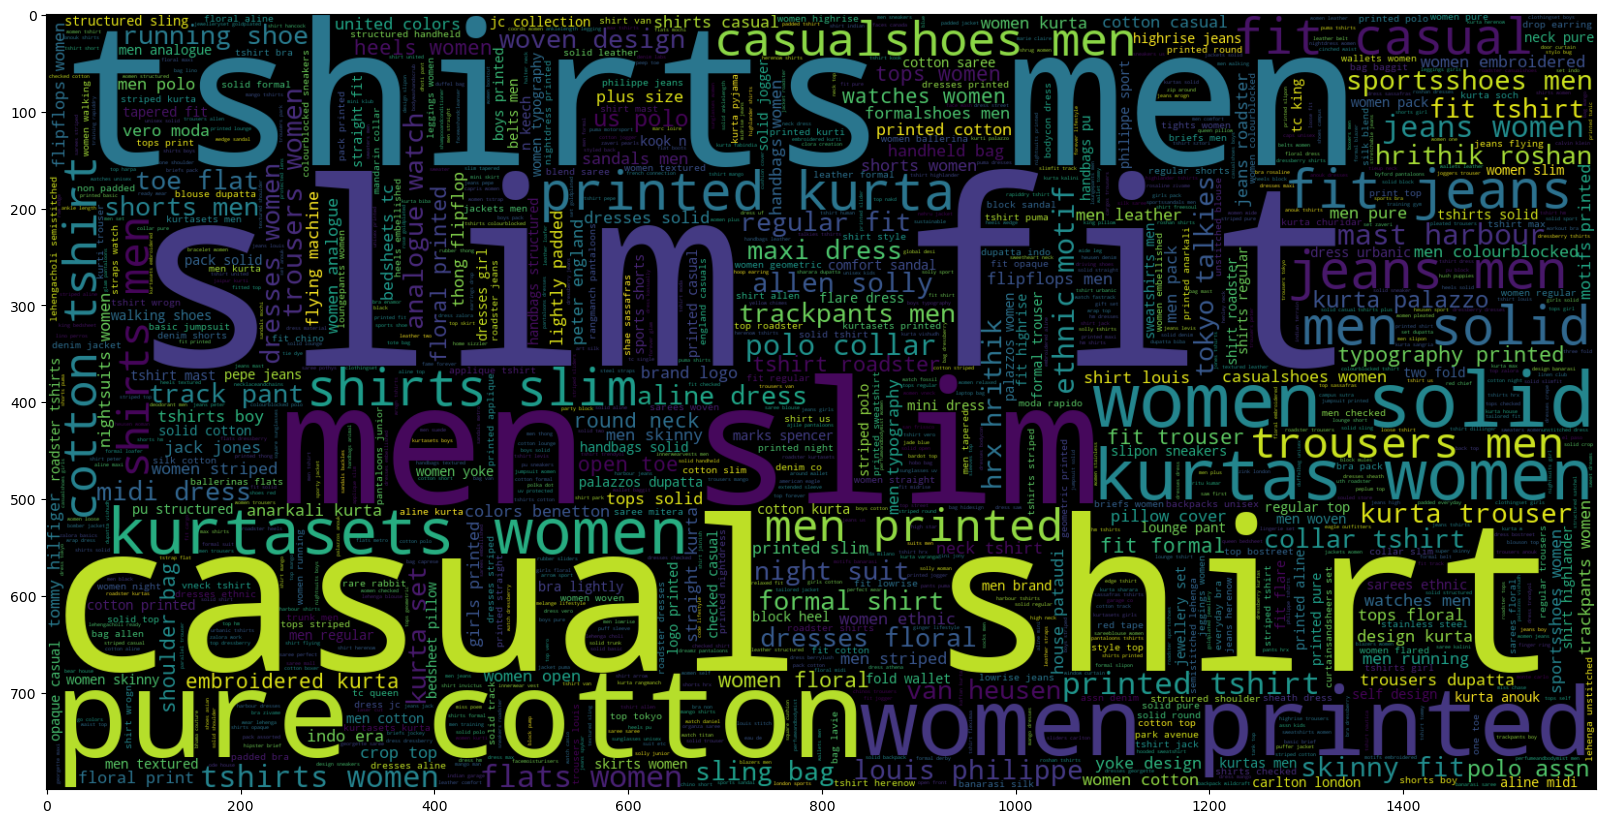

In [203]:
#Plotting wordcloud of features
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(myntra['features']))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer = WordNetLemmatizer()

# Define TfidfVectorizer
tfv = TfidfVectorizer(min_df = 20, stop_words = 'english', analyzer ="word" , strip_accents = "unicode", ngram_range= (1 , 3))

# Function to do lemmatization of text
def lemmatizeText(x):
    words = nltk.word_tokenize(x)
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x = ' '.join(words)
    return x

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv , tfv)
sig

In [ ]:
product_indices = [i[0] for i in cosine_sim_cs]

return myntra.iloc[product_indices]

In [205]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanfeat(features):
   # tokenization
    words = nltk.word_tokenize(features)
    return features

myntra['features'] = myntra['features'].apply(cleanfeat)
myntra['features']

0         wallets croc textured two fold wallet lino perros
1                flipflops men striped sliders mast harbour
2                           kurtas printed aline kurta biba
3              tshirts girls floral printed tshirt anthrilo
4          kurtasets women printed kurta skirt fashion dwar
                                ...                        
167987    kurtas women ethnic motifs printed georgette k...
167988    nightsuits abstract tie dye printed night suit...
167989                         dresses waisted dress athena
167990    lehengacholi ready wear lehenga blouse dupatta...
167991                 cushions solid twill seat cushion hm
Name: features, Length: 146611, dtype: object

In [160]:
#Tokenization
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download()

def sent_tokenization(features):
    tokens = []
    for sent in features:
        tokens.extend(sent_tokenize(sent))
    return tokens
            
myntra['features'] = myntra['features'].apply(sent_tokenization)
print(myntra['features'])

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
0         [w, a, l, l, e, t, s, c, r, o, c, t, e, x, t, ...
1         [f, l, i, p, f, l, o, p, s, m, e, n, s, t, r, ...
2         [k, u, r, t, a, s, p, r, i, n, t, e, d, a, l, ...
3         [t, s, h, i, r, t, s, g, i, r, l, s, f, l, o, ...
4         [k, u, r, t, a, s, e, t, s, w, o, m, e, n, p, ...
                                ...                        
167987    [k, u, r, t, a, s, w, o, m, e, n, e, t, h, n, ...
167988    [n, i, g, h, t, s, u, i, t, s, a, b, s, t, r, ...
167989    [d, r, e, s, s, e, s, w, a, i, s, t, e, d, d, ...
167990    [l, e, h, e, n, g, a, c, h, o, l, i, r, e, a, ...
167991    [c, u, s, h, i, o, n, s, s, o, l, i, d, t, w, ...
Name: features, Length: 146611, dtype: object


The CountVectorizer is a useful tool in NLP for converting a collection of text documents into a matrix of token counts.

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(myntra['features'].head(100))
word_matrix.shape

(100, 279)

In [175]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_matrix)
sim

array([[1.        , 0.        , 0.        , ..., 0.3380617 , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3380617 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

What are deriving recommendations over here in content based RS in the myntra dataset?

What columns do we have to take into consideration for content based RS in the myntra dataset?

How does the output look like when RS is successfully executed?

In [176]:
myntra.head()

product_tag                    product_name      brand_name  \
0     wallets   Croc Textured Two Fold Wallet     Lino Perros   
1  flip-flops             Men Striped Sliders  Mast & Harbour   
2      kurtas            Printed A-line Kurta            Biba   
3     tshirts    Girls Floral Printed T-shirt        Anthrilo   
4  kurta-sets  Women Printed Kurta with Skirt    FASHION DWAR   

                                            features  
0  wallets croc textured two fold wallet lino perros  
1        flipflops men striped sliders mast  harbour  
2                    kurtas printed aline kurta biba  
3       tshirts girls floral printed tshirt anthrilo  
4  kurtasets women printed kurta with skirt fashi...

In [177]:
myntra.head(1)['features']

0    wallets croc textured two fold wallet lino perros
Name: features, dtype: object

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', token_pattern= r'\w{1,}',
       ngram_range=(1,3),stop_words='english')
myntra['features'] = myntra['features'].fillna('')
myntra['features']

0         wallets croc textured two fold wallet lino perros
1               flipflops men striped sliders mast  harbour
2                           kurtas printed aline kurta biba
3              tshirts girls floral printed tshirt anthrilo
4         kurtasets women printed kurta with skirt fashi...
                                ...                        
167987    kurtas women ethnic motifs printed georgette k...
167988    nightsuits abstract tie and dye printed night ...
167989                         dresses waisted dress athena
167990    lehengacholi ready to wear lehenga  blouse wit...
167991                 cushions solid twill seat cushion hm
Name: features, Length: 146611, dtype: object

In [181]:
tfv_matrix = tfv.fit_transform(myntra['features'].head(1000))
tfv_matrix
#data.sample(frac = 0.5)

<1000x947 sparse matrix of type '<class 'numpy.float64'>'
	with 8925 stored elements in Compressed Sparse Row format>

In [182]:
tfv_matrix.shape

(1000, 947)

In [183]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [184]:
sig[0]

array([0.76203728, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76174268, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

In [185]:
indices = pd.Series(myntra['features'].head(1000).index, index=myntra['features'].head(1000)).drop_duplicates()

In [186]:
indices

features
wallets croc textured two fold wallet lino perros                          0
flipflops men striped sliders mast  harbour                                1
kurtas printed aline kurta biba                                            2
tshirts girls floral printed tshirt anthrilo                               3
kurtasets women printed kurta with skirt fashion dwar                      4
                                                                        ... 
tshirts women graphic joyful conversation tshirt kook n keech disney    1056
jeans women skinny fit highrise jeans purple feather                    1057
watches women analogue watch dressberry                                 1058
tshirts men striped slim fit tshirt wrogn                               1059
dresses tulleskirt dress hm                                             1060
Length: 1000, dtype: int64

In [189]:
idx = myntra['features'].head(100).index
idx

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
            105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64')

In [190]:
sig_scores = list(enumerate(sig[idx]))
sig_scores

[(0,
  array([0.76203728, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76174268, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.761594

In [192]:
sig_scores = sig_scores[1:11]
sig_scores

[(1,
  array([0.76159416, 0.76203728, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76160771, 0.76161061, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76161186,
         0.76159416, 0.76161142, 0.76159416, 0.76159416, 0.76160455,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76160497,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.76160583, 0.76159416, 0.76160464, 0.76159416, 0.76159416,
         0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
         0.7617185 , 0.76164736, 0.76159416, 0.76159416, 0.76159416,
         0.76159416, 0.76160187, 0.76159416, 0.76159416, 0.76177089,
         0.76159416, 0.76159416, 0.76160123, 0.76159416, 0.76160194,
         0.76159416, 0.76159416, 0.76160546, 0.76159416, 0.76160444,
         0.76164619, 0.76159416, 0.76160903, 0.7616022 , 0.76159416,
         0.76159416, 0.76160597, 0.76160199, 0.76159416, 0.76159416,
         0.7616038 , 0.761594

In [193]:
product_indices = [i[0] for i in sig_scores]
product_indices

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [194]:
myntra['features'].head(100).iloc[product_indices]

1           flipflops men striped sliders mast  harbour
2                       kurtas printed aline kurta biba
3          tshirts girls floral printed tshirt anthrilo
4     kurtasets women printed kurta with skirt fashi...
5              dresses floral cotton maxi dress vishudh
6                    tops fitted crop top tokyo talkies
7            sportsshoes men mesh running shoes woakers
8                sweaters men checked pullover roadster
9                       tops girls cotton jersey top hm
10                             caps cotton twill cap hm
Name: features, dtype: object

In [195]:
def give_rec (features, sig=sig):
    idx = indices[features]
    
    sig_scores = list(enumerate(sig[idx]))
    
    sig_scores = sorted (sig_scores, key=lambda x: x[1], reverse=True)
    
    sig_scores = sig_scores[1:11]
    
    product_indices = [i[0] for i in sig_scores]
    
    return myntra['features'].head(1000).iloc[product_indices]

In [198]:
give_rec ('caps cotton twill cap hm')

313     caps desert trekking cap desert 500 forclaz by...
447               caps unisex metal cat snapback cap puma
276         caps unisex running cap hrx by hrithik roshan
9                         tops girls cotton jersey top hm
365                     shorts motifdetail sweatshorts hm
1039                   caps self design beanie dressberry
164                              tops women cutout top hm
965                   tops women knitted tiedetail top hm
963                   casualshoes girls solid trainers hm
1060                          dresses tulleskirt dress hm
Name: features, dtype: object

Feature Engineering
In my myntra dataset, it has many null values available and data of columns were not suitable for training the model so for the efficient model training, feature engineering of the dataset was needed. I have created various functions for perticular column to preprocess the data.

Popularity Based Recommandation:
As the name suggests Popularity based recommendation system works with the trend. By using ratings dataset, I found total no. of ratings on each products and average ratings of products. Then I separete products based on threshold value which I applied on totalRatings and sort products in decending order of average rating. This is how I got popular 100 products.

Content Based Recommandation:
In this recommender system the content of the product (actual_color, dominant_color, product_type, product_details, complete_the_look, inventory, specifications etc) is used to find its similarity with other products. I combined content of the product into one corpus by doing preprocessing on text and then apply lemmatization and remove stopwords from corpus of data using nltk (natural language processing toolkit) library.

Then by TfidfVectorizer in sklearn library, I convert my corpus of Data into vectors.

Now, I applied sigmoid_kernel through sklearn, I find the cosine similarity between products.

Similarity score
How does it decide which item is most similar to the item user likes? Here come the similarity scores.

It is a numerical value ranges between zero to one which helps to determine how much two items are similar to each other on a scale of zero to one. This similarity score is obtained measuring the similarity between the text details of both of the items. So, similarity score is the measure of similarity between given text details of two items. This can be done by cosine-similarity.

Then the products that are most likely to be similar are recommended.

How does Cosine Similarity Works??
Cosine Similarity

The cosine similarity metric is used to determine how similar documents are regardless of their size. It estimates the cosine of the angle formed by two vectors projected in a multi-dimensional space mathematically. Because of the cosine similarity, even if two comparable documents are separated by the Euclidean distance (due to the size of the documents), they are likely to be orientated closer together. The higher the cosine similarity, the smaller the angle.

Cosine Similarity

Collaborative Filtering
Collaborative Filtering doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future.

Basically, the idea is to find the most similar users to your target user (nearest neighbors) and weight their ratings of an item as the prediction of the rating of this item for target user.

Matrix Factorization
What matrix factorization eventually gives us is how much a user is aligned with a set of latent features, and how much a movie fits into this set of latent features.

Cosine Similarity

Product Recommandation from Image
Resnet is a pre trained image processing model. I used resnet which is a backbone of computer vision tasks to extract features from the images available in my dataset. I also extract features of uploaded image using resnet model. Then using Nearest Neighbour classifier I get the nearest similar products and show it to user.

# Content based Recommendation model using TF-IDF, cosine similarity

In [ ]:
# import ntlk
import nltk
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
import re
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
myntra = pd.read_csv("Myntra_data.csv")
myntra['features'] = myntra['product_tag'] + ' ' + myntra['product_name'] + ' ' + myntra['brand_name']
print(myntra['features'])

In [ ]:
# Tokenize sentences and words in the 'features' column
myntra['sentence_tokens'] = myntra['features'].apply(sent_tokenize)
myntra['word_tokens'] = myntra['features'].apply(word_tokenize)

# Print the tokenized data
print("Tokenized sentences:")
print()
print(myntra['sentence_tokens'])

print("\nTokenized words:")
print()
print(myntra['word_tokens'])

In [ ]:
# converted to lower case
myntra['features'] = myntra['features'].apply(lambda x : x.lower())
myntra['features']

In [ ]:
# Define a function to remove special characters and digits
def remove_special_characters_and_digits(text):
    # Use regex to remove special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Apply the function to the 'features' column
myntra['cleaned_features'] = myntra['features'].apply(remove_special_characters_and_digits)

# Print the cleaned features
print(myntra['cleaned_features'])

In [ ]:
#Remove stop words

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the function to the 'features' column
myntra['cleaned_features'] = myntra['features'].apply(remove_stopwords)

# Print the cleaned features
print(myntra['cleaned_features'])

In [ ]:
# The string.punctuation constant contains the following punctuation characters: !"#$%&'()*+,-./:;<=>?@[\]^_{|}~`which will be removed
# remove punctuations
def remove_punctuations(features):
    for punctuation in string.punctuation:
        features = features.replace(punctuation, '')
    return features
myntra['features'] = myntra['features'].apply(remove_punctuations)  
myntra['features']

In [ ]:
tfidf = TfidfVectorizer(stop_words="english")
myntra['features'] = myntra['features'].fillna("")
tfidf.fit_transform(myntra['features'])
# need to develop a vector based on the words in the features column
# split open all the words when fit_transform is applied

In [ ]:
tfv = tfidf.fit_transform(myntra['features'].head(15000))
tfv
# creates a matrix/grid for us so that we can look for recommended products based on the cosine similarity of the vectors of 
# all these products

In [ ]:
tfv.shape

In [ ]:
# For getting cosine similarity

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfv , tfv) # creates a reference of each prod with the other
cosine_sim

In [ ]:
# need to get the indices and the product names
# use the syntax of the Series
indices = pd.Series(myntra['features'].head(10000).index , index = myntra['features'].head(10000)).drop_duplicates()
indices

In [ ]:
indices['kurtas printed aline kurta biba']

In [ ]:
# Algorithm to recommend similar products based on the content/description of a product
def recommendProduct(features , cosine_sim=cosine_sim): # providing cosine_sim the default parameter
            
    index = indices[features] # extracting the reference through the indices
    
    cosine_sim_cs = enumerate(cosine_sim[index]) # get the pair-wise similarity scores for all the products with that product
    
    cosine_sim = sorted(cosine_sim_cs , key = lambda x : x[1] , reverse= True)
    
    cosine_sim_cs = cosine_sim[1: 11]
    
    product_indices = [i[0] for i in cosine_sim_cs]
    
    return myntra.iloc[product_indices]

In [ ]:
recommendProduct("tshirts girls floral printed tshirt anthrilo")

In [ ]:
recommendProduct("belts men belt kastner")

# Using Word2Vec

In [ ]:
# Tokenize sentences and words in the 'features' column
myntra['sentence_tokens'] = myntra['features'].apply(sent_tokenize)
myntra['word_tokens'] = myntra['features'].apply(word_tokenize)

# Print the tokenized data
print("Tokenized sentences:")
print()
print(myntra['sentence_tokens'])

print("\nTokenized words:")
print()
print(myntra['word_tokens'])

In [ ]:
# Define a function to remove special characters and digits
def remove_special_characters_and_digits(text):
    # Use regex to remove special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Apply the function to the 'features' column
myntra['cleaned_features'] = myntra['features'].apply(remove_special_characters_and_digits)

# Print the cleaned features
print(myntra['cleaned_features'])

In [ ]:
#Remove stop words

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the function to the 'features' column
myntra['cleaned_features'] = myntra['features'].apply(remove_stopwords)

# Print the cleaned features
print(myntra['cleaned_features'])

In [ ]:
# find out the length of the text of a myntra['feature'] column
# Apply the len() function to each entry in the 'features' column
myntra['feature_length'] = myntra['features'].apply(len)

# Print the length of the text in the 'features' column
print(myntra['feature_length'])

In [ ]:
# Python program to generate word vectors using Word2Vec
# Create a Word2Vec model for the 'features' column of the DataFrame myntra

import gensim
from gensim.models import Word2Vec

# Tokenize the text in the 'features' column
tokenized_features = [word_tokenize(feature.lower()) for feature in myntra['features']]

# Create CBOW model
# Set up and train the Word2Vec model
model1 = Word2Vec(sentences=tokenized_features, vector_size=100, window=5, min_count=1, workers=4)

# Print results
print("Cosine similarity between 'biba' " +
      "and 'kurta' - CBOW : ",
      model1.wv.similarity('biba', 'kurta'))
 
print("Cosine similarity between 'leather' " +
      "and 'sandals' - CBOW : ",
      model1.wv.similarity('leather', 'sandals'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(sentences=tokenized_features, min_count = 1, vector_size = 100, window = 5, sg = 1)

# Calculating & print the cosine similarity between two words
print("Cosine similarity between 'biba' " +
      "and 'kurta' - Skip Gram : ",
      model2.wv.similarity('biba', 'kurta'))
 
print("Cosine similarity between 'leather' " +
      "and 'sandals' - Skip Gram : ",
      model2.wv.similarity('leather', 'sandals'))

In [ ]:
# Test the model
word = 'trimmer'  # Example word to test similarity
similar_words = model.wv.most_similar(word)
print(f"Words similar to '{word}': {similar_words}")

In [ ]:
model1 = gensim.models.Word2Vec(sentences=tokenized_features, min_count = 1,vector_size = 100, window = 5, sg=0)
model2 = gensim.models.Word2Vec(sentences=tokenized_features, min_count = 1, vector_size = 100, window = 5, sg = 1)

In [ ]:
# Test the model1
word = 'trimmer'  # Example word to test similarity
similar_words = model1.wv.most_similar(word)
print(f"Words similar to '{word}': {similar_words}")

In [ ]:
# Test the model2
word = 'trimmer'  # Example word to test similarity
similar_words = model2.wv.most_similar(word)
print(f"Words similar to '{word}': {similar_words}")

# Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Concatenate 'product_tag', 'product_name', and 'brand_name' columns to create 'features'
myntra['features'] = myntra['product_tag'] + ' ' + myntra['product_name'] + ' ' + myntra['brand_name']

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the features and transform the features into vectors
feature_vectors = vectorizer.fit_transform(myntra['features'])

# Convert the feature vectors to an array
feature_vectors_array = feature_vectors.toarray()

# Print the feature vectors
print("Feature vectors:")
print(feature_vectors_array)

# count vectorizer

In [ ]:
Text1 = "Natural Language Processing is a subfield of AI"
tag1 = "NLP"

Text2 = "Computer Vision is a subfield of AI"
tag2 = "CV"

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer as CV
cv = CV()   # The expression cv = CV() likely refers to the creation of an instance of a class named CV and assigning 
            # it to the variable cv
            # In Python, this expression typically indicates the instantiation of an object from a class

In [ ]:
TF = no. of rep of words in a sentence/No. of words in a sentence
IDF = log(No.of sentences/No.of sentences containing the words)

In [ ]:
'''In summary, cv.fit([Text1, Text2]) could refer to fitting either a text vectorization model or a 
cross-validation object to the provided text data, depending on the context and the library being used
'''

In [ ]:
# The fit() method in this context is used to learn the vocabulary and other parameters from the provided text data
# Fit the CountVectorizer to the text data
cv.fit([Text1, Text2])

In [ ]:
# cv.transform([Text1]) likely refers to transforming the provided text Text1 into a numerical representation 
# using a vectorization model or transformer object cv
# Count Vectorizer assembles the contents of text1 & text2 alphabetically, calculates the frequency of the occurrence 
# of each word
x= cv.transform([Text1]).toarray()
print(x)
print()
y= cv.transform([Text2]).toarray()
print(y)
print()

In [ ]:
# Get the feature names (vocabulary) learned by the CountVectorizer
# cv.get_feature_names() is the correct method to retrieve the feature names or vocabulary learned during the 
# vectorization process when using scikit-learn's CountVectorizer or TfidfVectorizer for text data.
columns = cv.get_feature_names_out()
columns

# the get_feature_names method is no longer supported in version 1.2 and above. 
# However, it should work fine in version 1.1 and earlier. If you have upgraded your scikit-learn version to 1.2, 
# I suggest using the get_feature_names_out method instead

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

Text1 = "Natural Language Processing is a subfield of AI"
tag1 = "NLP"

Text2 = "Computer Vision is a subfield of AI"
tag2 = "CV"

vectorizer.fit([Text1, Text2])

X = vectorizer.fit_transform([Text1, Text2])

features = vectorizer.get_feature_names_out()

features

In [ ]:
df1 = pd.DataFrame(x, columns= columns, index= ["Text1"])
df2 = pd.DataFrame(y, columns= columns, index= ["Text2"])
df = pd.concat([df1,df2])
df["tag"] = ["NLP", "CV"]
df 